In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu May 16 20:57:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   38C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import sys

DIRETORIO_DRIVE = "/content/drive/MyDrive/USDMM/"
sys.path.insert(0, DIRETORIO_DRIVE)

In [4]:
import os

os.chdir(DIRETORIO_DRIVE)

In [5]:
import jax
import jax.numpy as jnp

import USDMM_class
import importlib
import copy

importlib.reload(USDMM_class)

<module 'USDMM_class' from '/content/drive/MyDrive/USDMM/USDMM_class.py'>

In [6]:
USDMM_class.WOMC_DATA(
    nlayer = 2, # INT -> Number of operators in each layer
    wlen = 3,  # INT -> Size of the operator (wlen*wlen)
    train_size = 10, # INT -> Number of images to train
    val_size = 10, # INT -> Number of images to validate
    test_size = 10, # INT -> Number of images to test
    error_type = 'iou', # 'mae' / 'iou' -> type of error
    neighbors_sample = 8, # INT/False -> Number of neighbors to sort
    epoch_f = 100, # INT -> Number of epochs for the boolean function lattice (fixed windows)
    epoch_w = 20, # INT -> Number of epochs for the windows lattice
    batch = 10, # INT -> Batch size
    path_results = 'results_V5', # STR -> file where we want to save the results
    name_save='_V5', # STR -> pos fixed name for the results saved
    seed = 0, #INT -> seed for reproducibilit
    early_stop_round_f = 1e6, #20, #INT -> max number of epochs without changes in the boolean function lattice
    early_stop_round_w = 1e6 #10 #INT -> max number of epochs without changes in the windows lattice
)

In [7]:
import USDMM_JAX as USDMM

Resultados serão salvos em  results_V5
------------------------------------------------------------------


In [ ]:
importlib.reload(USDMM)

Resultados serão salvos em  results_V5
------------------------------------------------------------------


<module 'USDMM_JAX' from '/content/drive/MyDrive/USDMM/USDMM_JAX.py'>

In [8]:
USDMM.fit()

Time: 0.17 | Epoch 0 / 20 - start Validation error: 0.3045
Time: 1.04 | Epoch 1 / 20 - Validation error: 0.0403 | Min-Epoch 1
Time: 1.83 | Epoch 2 / 20 - Validation error: 0.0342 | Min-Epoch 2
Time: 2.44 | Epoch 3 / 20 - Validation error: 0.0475 | Min-Epoch 2
Time: 3.05 | Epoch 4 / 20 - Validation error: 0.0535 | Min-Epoch 2
Time: 3.82 | Epoch 5 / 20 - Validation error: 0.0325 | Min-Epoch 5
Time: 4.50 | Epoch 6 / 20 - Validation error: 0.0343 | Min-Epoch 5
Time: 5.05 | Epoch 7 / 20 - Validation error: 0.0322 | Min-Epoch 7
Time: 5.51 | Epoch 8 / 20 - Validation error: 0.0358 | Min-Epoch 7
Time: 5.98 | Epoch 9 / 20 - Validation error: 0.0403 | Min-Epoch 7
Time: 6.36 | Epoch 10 / 20 - Validation error: 0.0525 | Min-Epoch 7
Time: 6.74 | Epoch 11 / 20 - Validation error: 0.0404 | Min-Epoch 7
Time: 7.17 | Epoch 12 / 20 - Validation error: 0.0452 | Min-Epoch 7
Time: 7.55 | Epoch 13 / 20 - Validation error: 0.0414 | Min-Epoch 7
Time: 7.99 | Epoch 14 / 20 - Validation error: 0.0466 | Min-Epoch 

In [ ]:
USDMM.fit()

Time: 0.03 | Epoch 0 / 20 - start Validation error: 0.3055
Time: 0.57 | Epoch 1 / 20 - Validation error: 0.0654 | Min-Epoch 1
Time: 1.06 | Epoch 2 / 20 - Validation error: 0.0506 | Min-Epoch 2
Time: 1.58 | Epoch 3 / 20 - Validation error: 0.0304 | Min-Epoch 3
Time: 2.14 | Epoch 4 / 20 - Validation error: 0.0298 | Min-Epoch 4
Time: 2.61 | Epoch 5 / 20 - Validation error: 0.0297 | Min-Epoch 5
Time: 3.22 | Epoch 6 / 20 - Validation error: 0.0308 | Min-Epoch 5
Time: 3.70 | Epoch 7 / 20 - Validation error: 0.0311 | Min-Epoch 5
Time: 4.17 | Epoch 8 / 20 - Validation error: 0.0402 | Min-Epoch 5
Time: 4.67 | Epoch 9 / 20 - Validation error: 0.0338 | Min-Epoch 5
Time: 5.16 | Epoch 10 / 20 - Validation error: 0.0327 | Min-Epoch 5
Time: 5.56 | Epoch 11 / 20 - Validation error: 0.0327 | Min-Epoch 5
End by Early Stop Round
---------------------------------------------------------
End of testing
Total Time: 5.56 minutes| Min-Epoch 5 - Train error: 0.0212 / Validation error: 0.0297 / Test error: 0.02

In [ ]:
#30 imagens -> batch = 10
USDMM.fit()

Time: 0.27 | Epoch 0 / 20 - start Validation error: 0.0916
Time: 2.29 | Epoch 1 / 20 - Validation error: 0.0628 | Min-Epoch 1
Time: 4.16 | Epoch 2 / 20 - Validation error: 0.0479 | Min-Epoch 2
Time: 5.91 | Epoch 3 / 20 - Validation error: 0.0497 | Min-Epoch 2
Time: 7.67 | Epoch 4 / 20 - Validation error: 0.0342 | Min-Epoch 4
Time: 9.44 | Epoch 5 / 20 - Validation error: 0.0310 | Min-Epoch 5
Time: 11.22 | Epoch 6 / 20 - Validation error: 0.0283 | Min-Epoch 6
Time: 12.75 | Epoch 7 / 20 - Validation error: 0.0316 | Min-Epoch 6
Time: 14.15 | Epoch 8 / 20 - Validation error: 0.0235 | Min-Epoch 8
Time: 15.06 | Epoch 9 / 20 - Validation error: 0.0315 | Min-Epoch 8
Time: 16.46 | Epoch 10 / 20 - Validation error: 0.0327 | Min-Epoch 8
Time: 17.89 | Epoch 11 / 20 - Validation error: 0.0358 | Min-Epoch 8
Time: 19.18 | Epoch 12 / 20 - Validation error: 0.0632 | Min-Epoch 8
Time: 20.47 | Epoch 13 / 20 - Validation error: 0.0703 | Min-Epoch 8
Time: 21.63 | Epoch 14 / 20 - Validation error: 0.0676 | M

In [ ]:
USDMM.fit()

Time: 0.18 | Epoch 0 / 20 - start Validation error:  0.09160858
Time: 2.79 | Epoch 1 / 20 - Validation error: 0.0627778097987175 | Min-Epoch 1
Time: 5.22 | Epoch 2 / 20 - Validation error: 0.0479147844016552 | Min-Epoch 2
Time: 7.51 | Epoch 3 / 20 - Validation error: 0.04965054616332054 | Min-Epoch 2
Time: 9.82 | Epoch 4 / 20 - Validation error: 0.03419014811515808 | Min-Epoch 4
Time: 12.14 | Epoch 5 / 20 - Validation error: 0.030970890074968338 | Min-Epoch 5
Time: 14.47 | Epoch 6 / 20 - Validation error: 0.028342431411147118 | Min-Epoch 6
Time: 16.47 | Epoch 7 / 20 - Validation error: 0.03156697377562523 | Min-Epoch 6
Time: 18.31 | Epoch 8 / 20 - Validation error: 0.023508472368121147 | Min-Epoch 8
Time: 19.50 | Epoch 9 / 20 - Validation error: 0.03148580342531204 | Min-Epoch 8
Time: 21.34 | Epoch 10 / 20 - Validation error: 0.0327208936214447 | Min-Epoch 8
Time: 23.19 | Epoch 11 / 20 - Validation error: 0.035795360803604126 | Min-Epoch 8
Time: 24.87 | Epoch 12 / 20 - Validation error

Array([0.02422694, 0.02350847], dtype=float32)

In [ ]:
USDMM.fit()

Time: 0.32 | Epoch 0 / 20 - start Validation error:  0.09160858
Time: 2.95 | Epoch 1 / 20 - Validation error: 0.0627778097987175 | Min-Epoch 1
Time: 5.40 | Epoch 2 / 20 - Validation error: 0.0479147844016552 | Min-Epoch 2
Time: 7.70 | Epoch 3 / 20 - Validation error: 0.04965054616332054 | Min-Epoch 2
Time: 10.01 | Epoch 4 / 20 - Validation error: 0.03419014811515808 | Min-Epoch 4
Time: 12.33 | Epoch 5 / 20 - Validation error: 0.030970890074968338 | Min-Epoch 5
Time: 14.67 | Epoch 6 / 20 - Validation error: 0.028342431411147118 | Min-Epoch 6
Time: 16.69 | Epoch 7 / 20 - Validation error: 0.03156697377562523 | Min-Epoch 6
Time: 18.54 | Epoch 8 / 20 - Validation error: 0.023508472368121147 | Min-Epoch 8
Time: 19.73 | Epoch 9 / 20 - Validation error: 0.03148580342531204 | Min-Epoch 8
Time: 21.58 | Epoch 10 / 20 - Validation error: 0.0327208936214447 | Min-Epoch 8
Time: 23.45 | Epoch 11 / 20 - Validation error: 0.035795360803604126 | Min-Epoch 8
Time: 25.15 | Epoch 12 / 20 - Validation erro

Array([0.02422694, 0.02350847], dtype=float32)

In [ ]:
USDMM.fit()

Time: 0.18 | Epoch 0 / 20 - start Validation error:  0.09160858
Time: 2.81 | Epoch 1 / 20 - Validation error: 0.0627778097987175
Time: 5.26 | Epoch 2 / 20 - Validation error: 0.0479147844016552
Time: 7.56 | Epoch 3 / 20 - Validation error: 0.04965054616332054
Time: 9.87 | Epoch 4 / 20 - Validation error: 0.03419014811515808
Time: 12.19 | Epoch 5 / 20 - Validation error: 0.030970890074968338
Time: 14.53 | Epoch 6 / 20 - Validation error: 0.028342431411147118
Time: 16.54 | Epoch 7 / 20 - Validation error: 0.03156697377562523
Time: 18.40 | Epoch 8 / 20 - Validation error: 0.023508472368121147
Time: 19.59 | Epoch 9 / 20 - Validation error: 0.03148580342531204
Time: 21.43 | Epoch 10 / 20 - Validation error: 0.0327208936214447
Time: 23.30 | Epoch 11 / 20 - Validation error: 0.035795360803604126
Time: 25.01 | Epoch 12 / 20 - Validation error: 0.06315208971500397
Time: 26.69 | Epoch 13 / 20 - Validation error: 0.07027798146009445
Time: 28.22 | Epoch 14 / 20 - Validation error: 0.06759706139564

TypeError: '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [ ]:
Wini = jnp.array([0, 1, 0, 1, 1, 1, 0, 1, 0]).astype(jnp.int8)
W = jnp.array([Wini.copy() for _ in range(USDMM.WOMC.nlayer)])
joint,joint_shape = USDMM.create_joint(W)

W_matrices_all = USDMM.create_w_matrices(W, USDMM.WOMC.dict_matrices)
W_matrices = USDMM.mult_w_matrices(W_matrices_all, joint)
W_last = jnp.zeros((USDMM.WOMC.nlayer,) + USDMM.WOMC.jax_train.shape)
bias = jnp.sum(W, axis=1) - 1

Wtrain,w_error =  USDMM.window_error_generate_train(W_matrices,USDMM.WOMC.jax_train, USDMM.WOMC.jax_ytrain, W_last, 0, bias)

In [ ]:
w_error

Array(0.58775693, dtype=float32)

In [ ]:
Wtrain[1].shape

(30, 56, 56)

In [ ]:
USDMM._save_results(Wtrain, 'train', 1)

In [ ]:
import pickle
def save_window(joint, W):
  filename_joint = f'{USDMM.WOMC.path_results}/joint{USDMM.WOMC.name_save}.txt'
  pickle.dump(joint, open(filename_joint, 'wb'))
  filename_W =f'{USDMM.WOMC.path_results}/W{USDMM.WOMC.name_save}.txt'
  pickle.dump(W, open(filename_W, 'wb'))

In [ ]:
USDMM.save_window(joint, W)

In [ ]:
W_vi = jnp.load(f'{USDMM.WOMC.path_results}/W{USDMM.WOMC.name_save}.txt', allow_pickle=True)

In [ ]:
W_vi

Array([[0, 1, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 1, 0, 1, 0]], dtype=int8)

In [ ]:
USDMM.fit()

Time: 0.51 | Epoch 0 / 50 - start Validation error:  0.09160858
Time: 3.18 | Epoch 1 / 50 - Validation error: 0.0627778097987175
Time: 5.67 | Epoch 2 / 50 - Validation error: 0.05956807732582092
Time: 8.00 | Epoch 3 / 50 - Validation error: 0.05364685878157616
Time: 10.31 | Epoch 4 / 50 - Validation error: 0.05257576331496239
Time: 12.49 | Epoch 5 / 50 - Validation error: 0.04629450663924217
Time: 14.65 | Epoch 6 / 50 - Validation error: 0.029921388253569603
Time: 16.68 | Epoch 7 / 50 - Validation error: 0.025750411674380302
Time: 18.70 | Epoch 8 / 50 - Validation error: 0.024077488109469414
Time: 20.74 | Epoch 9 / 50 - Validation error: 0.023642195388674736
Time: 23.13 | Epoch 10 / 50 - Validation error: 0.02239004336297512
Time: 25.68 | Epoch 11 / 50 - Validation error: 0.02366398647427559
Time: 27.90 | Epoch 12 / 50 - Validation error: 0.02669692039489746
Time: 29.98 | Epoch 13 / 50 - Validation error: 0.02855994738638401
Time: 32.06 | Epoch 14 / 50 - Validation error: 0.02681041322

In [ ]:
USDMM.fit()

Time: 0.18 | Epoch 0 / 50 - start Validation error:  0.09160858
Time: 2.79 | Epoch 1 / 50 - Validation error: 0.0627778097987175
Time: 5.25 | Epoch 2 / 50 - Validation error: 0.05956807732582092
Time: 7.58 | Epoch 3 / 50 - Validation error: 0.05364685878157616
Time: 9.90 | Epoch 4 / 50 - Validation error: 0.05257576331496239
Time: 12.06 | Epoch 5 / 50 - Validation error: 0.04629450663924217
Time: 14.23 | Epoch 6 / 50 - Validation error: 0.029921388253569603
Time: 16.25 | Epoch 7 / 50 - Validation error: 0.025750411674380302
Time: 18.28 | Epoch 8 / 50 - Validation error: 0.024077488109469414
Time: 20.31 | Epoch 9 / 50 - Validation error: 0.023642195388674736
Time: 22.70 | Epoch 10 / 50 - Validation error: 0.02239004336297512
Time: 25.26 | Epoch 11 / 50 - Validation error: 0.02366398647427559
Time: 27.49 | Epoch 12 / 50 - Validation error: 0.02669692039489746
Time: 29.55 | Epoch 13 / 50 - Validation error: 0.02855994738638401
Time: 31.63 | Epoch 14 / 50 - Validation error: 0.026810413226

In [ ]:
Wini1 = jnp.array([0, 1, 0, 1, 1, 1, 0, 1, 0]).astype(jnp.int8)
Wini2 = jnp.array([0, 0, 0, 1, 1, 1, 0, 1, 0]).astype(jnp.int8)
Wini3 = jnp.array([1, 1, 1, 1, 1, 1, 1, 1, 1]).astype(jnp.int8)
#W = jnp.array([Wini.copy() for _ in range(USDMM.WOMC.nlayer)])
W = jnp.array([Wini1.copy(), Wini3.copy()])

In [ ]:
joint, joint_shape = USDMM.create_joint(W)

In [ ]:
joint_shape

NameError: name 'joint_shape' is not defined

In [ ]:
W_matrices_all = USDMM.create_w_matrices(W, USDMM.WOMC.dict_matrices)
W_matrices = USDMM.mult_w_matrices(W_matrices_all, joint)

In [ ]:
joint_, error, f_epoch_min= USDMM.get_error_window(W, joint,joint_shape, 0)

In [ ]:
%timeit joint_, error, epoch_min = USDMM.get_error_window(W, joint,joint_shape, 0)

9.85 s ± 219 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
error, f_epoch_min

(Array([0.17185643, 0.16789727], dtype=float32), 98)

In [ ]:
USDMM.WOMC.w_hist["W_key"].append(USDMM.WOMC.windows_visit)
USDMM.WOMC.w_hist["W"].append(W)
USDMM.WOMC.w_hist["error"].append(error)
USDMM.WOMC.w_hist["f_epoch_min"].append(f_epoch_min)

In [ ]:
USDMM.WOMC.w_hist

{'W_key': [1],
 'W': [Array([[0, 1, 0, 1, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8)],
 'error': [Array([0.10023267, 0.10593016], dtype=float32)],
 'f_epoch_min': [95]}

In [ ]:
ep_w = 0

In [ ]:
error, W_, joint_ = USDMM.check_neighboors(W,joint,joint_shape, ep_w)

In [ ]:
%timeit error, W_2, joint_2 = USDMM.check_neighboors(W_,joint_,joint_shape, ep_w)

222 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:

def check_neighboors(W,joint,joint_shape, ep_w):
    w_error0 = []
    w_error1 = []
    W_temp = []
    joint_temp = []
    for ix, i in enumerate(USDMM.WOMC.i_ix):
        w0, w1, wt, jt = USDMM.neighboors_func(W,joint,joint_shape, ep_w, USDMM.WOMC.k_ix[ix], i)
        w_error0.append(w0)
        w_error1.append(w1)
        W_temp.append(wt)
        joint_temp.append(jt)
    ix = jnp.argmin(jnp.array(w_error1))
    W_error = jnp.array([w_error0[ix], w_error1[ix]])
    W_min = W_temp[ix]
    joint_min = joint_temp[ix]
    return W_error, W_min, joint_min

In [ ]:
w_error0, w_error1, W_temp, joint_temp = check_neighboors(W,joint,joint_shape, ep_w)

In [ ]:
ix = jnp.argmin(jnp.array(w_error1))
W_error = jnp.array([w_error0[ix], w_error1[ix]])
W_min = W_temp[ix]
joint_min = joint_temp[ix]

In [ ]:
w_error1 = jnp.array(w_error1)

In [ ]:
w_error1

Array([0.22730875, 0.0922351 , 0.07768346, 0.25267133,        inf,
       0.08034926, 0.06249505, 0.22705022, 0.25836718, 0.10616896,
       0.03757997, 0.21959352, 0.23149434, 0.10278311, 0.2495495 ,
       0.06370795, 0.13935247, 0.04018445], dtype=float32)

In [ ]:
w_error1.shape

(18,)

In [ ]:
test = jnp.array([jnp.inf, jnp.inf, jnp.inf, jnp.inf])
jnp.argmin(test)

Array(0, dtype=int32)

In [ ]:
jnp.argmin(w_error1)

Array(10, dtype=int32)

In [ ]:
key = jax.random.PRNGKey(USDMM.WOMC.seed)
train_b, ytrain_b = USDMM.get_batches_jit(USDMM.WOMC.jax_train,USDMM.WOMC.jax_ytrain, key)
b=0
bias = jnp.sum(W, axis=1) - 1
W_last = jnp.zeros((USDMM.WOMC.nlayer,) + train_b[b].shape)
Wtrain,_ =  USDMM.window_error_generate_batch(W_matrices,train_b[b],ytrain_b[b], W_last, 0, bias)
neighbors_to_visit, ix = USDMM.get_random_neighbors(joint_shape)
error_ep_f_hist = USDMM.calculate_neighbors_jax(joint, W_matrices_all,ix,Wtrain, train_b[b],ytrain_b[b],bias,neighbors_to_visit)

In [ ]:
error_ep_f_hist

[Array([0.62882316, 0.7119396 , 0.6027114 , 0.6277036 , 0.7045714 ,
        0.62980914, 0.6271183 , 0.6303772 , 0.62725186, 0.62725186,
        0.6271615 , 0.6271048 , 0.62725186, 0.6313783 , 0.621045  ,
        0.62725186], dtype=float32),
 Array([[[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]],
 
        [[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]],
 
        [[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]],
 
        ...,
 
        [[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]],
 
        [[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]],
 
        [[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]]], dtype=int8),
 [Array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
  Array([ 22,  29,  23,  27,   8,  21,   5,  25, 313, 303,  69, 279, 447,
         258, 496, 299], dtype=int32)]]

In [ ]:
[error_hood, joint_temp, [k,i]]
ix = jnp.lexsort((error_ep_f_hist[2][1], error_ep_f_hist[2][0],error_ep_f_hist[0]))[0]
    return error_ep_f_hist[1][ix]

In [ ]:
import numpy as np

In [ ]:
error_ep_jax = np.array(error_ep)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (18, 4) + inhomogeneous part.

In [ ]:
ix = jnp.lexsort((error_ep[:, 4], error_ep[:, 1]))[0]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
error_ep[2][1]

Array(0.07768346, dtype=float32)

In [ ]:
error_ep

[[inf, inf, nan, nan, [Array(0, dtype=int8), Array(0, dtype=int8)]],
 [Array(0.08526489, dtype=float32),
  Array(0.0922351, dtype=float32),
  Array([[0, 0, 0, 1, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8),
  Array([[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]], dtype=int8),
  [Array(0, dtype=int8), Array(1, dtype=int8)]],
 [Array(0.07469252, dtype=float32),
  Array(0.07768346, dtype=float32),
  Array([[0, 1, 1, 1, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8),
  Array([[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]], dtype=int8),
  [Array(0, dtype=int8), Array(2, dtype=int8)]],
 [Array(0.25701225, dtype=float32),
  Array(0.25267133, dtype=float32),
  Array([[0, 1, 0, 0, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8),
  Array([[0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1]], dtype=int8),
  [Array(0, dtype=int8), Array(3, dtype=int8)]],
 [inf, inf, nan, nan, [Array(0, dtype=int8), Array(4,

In [ ]:
USDMM.WOMC.w_hist

{'W_key': [1, 2],
 'W': [Array([[0, 1, 0, 1, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8),
  Array([[1, 1, 0, 1, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8)],
 'error': [Array([0.10023267, 0.10593016], dtype=float32),
  Array([0.22431321, 0.22730875], dtype=float32)],
 'f_epoch_min': [95, 99]}

In [ ]:
error_ep1

NameError: name 'error_ep1' is not defined

In [ ]:
USDMM.neighboors_func(W,joint,joint_shape, ep_w, 0, 0)

[Array(0.22431321, dtype=float32),
 Array(0.22730875, dtype=float32),
 Array([[1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8),
 Array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1]], dtype=int8),
 [0, 0]]

In [ ]:
error_ep

[]

In [ ]:
error_ep = USDMM.check_neighboors(W, joint,joint_shape, 0, 0, 0)

In [ ]:
error_ep

[Array(0.22431321, dtype=float32),
 Array(0.22730875, dtype=float32),
 Array([[1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8),
 Array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1]], dtype=int8),
 [0, 0]]

In [ ]:
error_ep[3]

Array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int8)

In [ ]:
2**6

64

In [ ]:
jnp.array([64,512])

Array([ 64, 512], dtype=int32)

In [ ]:
joint_, error, f_epoch_min= USDMM.get_error_window(error_ep[2], error_ep[3],jnp.array([64,512]), 0)
error

Array([0.10023267, 0.10593016], dtype=float32)

In [ ]:
f_epoch_min

95

In [ ]:
for ix, i in enumerate(USDMM.WOMC.i_ix):
  print(ix,i,USDMM.WOMC.k_ix[ix])

0 0 0
1 1 0
2 2 0
3 3 0
4 4 0
5 5 0
6 6 0
7 7 0
8 8 0
9 0 1
10 1 1
11 2 1
12 3 1
13 4 1
14 5 1
15 6 1
16 7 1
17 8 1


In [ ]:
for k, i in jnp.meshgrid(jnp.arange(USDMM.WOMC.nlayer), jnp.arange(USDMM.WOMC.wsize), indexing='ij'):
  print(k,i)

[0 0 0 0 0 0 0 0 0] [1 1 1 1 1 1 1 1 1]
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 6 7 8]


In [ ]:
USDMM.WOMC.w_hist

{'W_key': [1, 2],
 'W': [Array([[0, 1, 0, 1, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8),
  Array([[1, 1, 0, 1, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8)],
 'error': [Array([0.17185643, 0.16789727], dtype=float32),
  Array([0.22431321, 0.22730875], dtype=float32)],
 'f_epoch_min': [98, 99]}

In [ ]:
%timeit error_ep = USDMM.check_neighboors(W, joint,joint_shape, 0, 0, 0)

8.79 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
USDMM.WOMC.k_ix, USDMM.WOMC.i_ix

In [ ]:
def check_neighbors(W, joint, joint_shape, ep_w, k, i):
    W_temp = jnp.array(W)
    W_temp = jnp.where(W[k][i] == 1, W_temp.at[k,i].set(0), W_temp)
    W_temp = jnp.where(W[k][i] == 0, W_temp.at[k,i].set(1), W_temp)
    cond1, cond2 = USDMM.check_w_hist(W_temp, k, USDMM.WOMC.w_hist["W"])

    # Define as funções a serem executadas para cada ramo da condição
    def true_fun(_):
        USDMM.WOMC.windows_visit+=1
        joint_temp = copy.deepcopy(joint)
        joint_shape_temp = copy.deepcopy(joint_shape)
        joint_k, shape_k = USDMM.create_layer_joint(W_temp[k])
        joint_temp = joint_temp.at[k].set(joint_k)
        joint_shape_temp = joint_shape_temp.at[k].set(shape_k)

        joint_temp, w_error, f_epoch_min = get_error_window(W_temp, joint_temp,joint_shape_temp, ep_w)

        USDMM.WOMC.w_hist["W_key"].append(USDMM.WOMC.windows_visit)
        USDMM.WOMC.w_hist["W"].append(W_temp)
        USDMM.WOMC.w_hist["error"].append(w_error)
        USDMM.WOMC.w_hist["f_epoch_min"].append(f_epoch_min)
        return [w_error[0], w_error[1], W_temp, joint_temp, [k,i]]

    def false_fun(_):
        # Operações para o caso contrário
        return [jnp.inf, jnp.inf, jnp.nan, jnp.nan, [k,i]]

    # lax.cond para realizar a operação condicional
    result = jax.lax.cond(cond1 & ~cond2, true_fun, false_fun, None)

    return result

In [ ]:
error_ep2 = check_neighbors(W, joint,joint_shape, 0, 0, 0)

TypeError: Shapes must be 1D sequences of concrete values of integer type, got (Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=1/0)>,).
If using `jit`, try using `static_argnums` or applying `jit` to smaller subfunctions.
The error occurred while tracing the function true_fun at <ipython-input-118-2dca06b48319>:8 for cond. This value became a tracer due to JAX operations on these lines:

  operation a:i8[1,9] = slice[limit_indices=(1, 9) start_indices=(0, 0) strides=None] b
    from line <ipython-input-118-2dca06b48319>:12 (true_fun)

In [ ]:
error_ep = USDMM.check_neighboors_vmap(W, joint,joint_shape, 0, USDMM.WOMC.k_ix, USDMM.WOMC.i_ix)

TracerBoolConversionError: Attempted boolean conversion of traced array with shape bool[]..
This BatchTracer with object id 134651970770864 was created on line:
  /content/drive/MyDrive/USDMM/USDMM_JAX.py:262 (check_neighboors)
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerBoolConversionError

In [ ]:
error_ep

[Array(0.6328081, dtype=float32),
 Array(0.63820124, dtype=float32),
 Array([[1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int8),
 Array([[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1]], dtype=int8),
 [0, 0]]

In [ ]:
W_matrices.shape

(2, 512, 3, 3)

In [ ]:
W_matrices[0][1]

Array([[ 0, -1,  0],
       [-1, -1, -1],
       [ 0,  1,  0]], dtype=int8)

In [ ]:
joint_, error, epoch_min = USDMM.get_error_window(W, joint,joint_shape, 0)

In [ ]:
error, epoch_min

(Array([0.17185643, 0.16789727], dtype=float32), 98)

In [ ]:
%timeit joint_, error, epoch_min = USDMM.get_error_window(W, joint,joint_shape, 0)

9.78 s ± 200 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
jax_train_int = USDMM.WOMC.jax_train.astype(jnp.int8)

In [ ]:
jax_train_int2 = jnp.array(USDMM.WOMC.train, )

In [ ]:
jax_train_int[0]

Array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int8)

In [ ]:
jnp.array_equal(jax_train_int[0], USDMM.WOMC.jax_train[0])

Array(True, dtype=bool)

In [ ]:
img_int = USDMM.WOMC.jax_train[0].astype(jnp.int8)

In [ ]:
W_matrices_int = W_matrices[0][1].astype(jnp.int8)

In [ ]:
W_matrices_int

Array([[ 0, -1,  0],
       [-1, -1, -1],
       [ 0,  1,  0]], dtype=int8)

In [ ]:
from jax.scipy.signal import convolve2d as convolve2d_jax
img_r = convolve2d_jax(img_int, W_matrices_int, mode='same')-4

In [ ]:
img_int_final = (img_r > 0).astype(jnp.int8)

In [ ]:
img_r

Array([[-1.,  0.,  0., ...,  0.,  0., -1.],
       [-2., -1., -1., ..., -1., -1., -2.],
       [-2., -1., -1., ..., -1., -1., -2.],
       ...,
       [-2., -1., -1., ..., -1., -1., -2.],
       [-2., -1., -1., ..., -1., -1., -2.],
       [-3., -2., -2., ..., -2., -2., -3.]], dtype=float32)

In [ ]:
(img_r > 0).astype(jnp.int8)

Array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [ ]:
img_int_final

Array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [ ]:
img_float = jnp.array(USDMM.WOMC.jax_train[0])

In [ ]:
W_matrices_int = W_matrices[0][1].astype(jnp.int8)

In [ ]:
W_matrices_int

Array([[ 0, -1,  0],
       [-1, -1, -1],
       [ 0,  1,  0]], dtype=int8)

In [ ]:
from jax.scipy.signal import convolve2d as convolve2d_jax
img_r2 = convolve2d_jax(USDMM.WOMC.jax_train[0], W_matrices[0][1], mode='same')-4

In [ ]:
jnp.array_equal(img_int_final, img_float_final)

Array(True, dtype=bool)

In [ ]:
img_float_final = (img_r2 > 0).astype(float)

In [ ]:
img_r2

Array([[-1.,  0.,  0., ...,  0.,  0., -1.],
       [-2., -1., -1., ..., -1., -1., -2.],
       [-2., -1., -1., ..., -1., -1., -2.],
       ...,
       [-2., -1., -1., ..., -1., -1., -2.],
       [-2., -1., -1., ..., -1., -1., -2.],
       [-3., -2., -2., ..., -2., -2., -3.]], dtype=float32)

In [ ]:
img_float

Array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
USDMM.WOMC.jax_train[0]

Array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [ ]:
joint_shape

Array([ 32, 512], dtype=int32)

In [ ]:
joint.shape

(2, 512, 1, 1)

In [ ]:
W_matrices_all = USDMM.create_w_matrices(W, USDMM.WOMC.dict_matrices)

In [ ]:
W_matrices_all.shape

(2, 512, 3, 3)

In [ ]:
W_matrices = USDMM.mult_w_matrices(W_matrices_all, joint)

In [ ]:
W_matrices.shape

(2, 512, 3, 3)

In [ ]:
joint_shape

Array([ 32, 512], dtype=int32)

In [ ]:
neighbors_to_visit, ix = USDMM.get_random_neighbors(joint_shape)

In [ ]:
for k, sublist in enumerate(joint):
  print(k)

0
1


In [ ]:
joint_shape[0]

Array(32, dtype=int32)

In [ ]:
def create_w_matrices(W, dict_matrices):
    matrices = []
    W_arrays = jnp.array(dict_matrices["W"])
    for k in range(USDMM.WOMC.nlayer):
        ix = jnp.where(jnp.all(W_arrays == W[k], axis=1))[0][0]
        matrices_jax = jnp.array(dict_matrices["W_matrices"][ix])
        pad_size = USDMM.WOMC.joint_max_size - matrices_jax.shape[0]
        padding_config = [(0, pad_size, 0), (0, 0, 0), (0, 0, 0)]
        padded_matrices = jax.lax.pad(matrices_jax, 0.0, padding_config)
        matrices.append(padded_matrices)

    return jnp.array(matrices)

In [ ]:
W_matrices_all = create_w_matrices(W, USDMM.WOMC.dict_matrices)

In [ ]:
%timeit W_matrices_all = create_w_matrices(W, USDMM.WOMC.dict_matrices)

256 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
W_matrices_all.shape

(2, 512, 3, 3)

In [ ]:
W_matrices_all[0][0]

Array([[ 0., -1.,  0.],
       [-1., -1., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [ ]:
W_matrices = USDMM.mult_w_matrices(W_matrices_all, joint)

In [ ]:
len(W_matrices), W_matrices[0].shape, W_matrices[1].shape

(2, (512, 3, 3), (512, 3, 3))

In [ ]:
W_matrices_all = USDMM.create_w_matrices(W, USDMM.WOMC.dict_matrices)

In [ ]:
len(W_matrices_all), W_matrices_all[0].shape, W_matrices_all[1].shape

(2, (32, 3, 3), (512, 3, 3))

In [ ]:
(W[0]*joint[0]).shape, (W[1]*joint[1]).shape

((512, 1, 9), (512, 1, 9))

In [ ]:
W_matrices = USDMM.mult_w_matrices(W_matrices_all, joint)

TypeError: mul got incompatible shapes for broadcasting: (32, 3, 3), (512, 1, 1).

In [ ]:
k = 0
joint[k][0:joint_shape[k]].shape

(32, 1, 1)

In [ ]:
joint[k].shape

(512, 1, 1)

In [ ]:
#@jax.jit
def mult_w_matrices(W, joint, joint_shape):
    def single_mult(k):
        start_indices = (0,) * len(joint[k].shape)
        slice_size = [joint_shape[k]] + list(joint[k].shape[1:])
        sliced_joint = jax.lax.dynamic_slice(joint[k], start_indices, slice_size)
        return W[k] * sliced_joint

    results = [single_mult(k) for k in range(len(W))]
    return results

In [ ]:
W_matrices = mult_w_matrices(W_matrices_all, joint,joint_shape)

In [ ]:
%timeit W_matrices = mult_w_matrices(W_matrices_all, joint,joint_shape)

11 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
len(W_matrices), W_matrices[0].shape, W_matrices[1].shape

(2, (32, 3, 3), (512, 3, 3))

In [ ]:
mult_w_matrices_jit = jax.jit(mult_w_matrices)

In [ ]:
W_matrices = mult_w_matrices_jit(W_matrices_all, joint,joint_shape)

TypeError: Shapes must be 1D sequences of concrete values of integer type, got [Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=1/0)>, 1, 1].
If using `jit`, try using `static_argnums` or applying `jit` to smaller subfunctions.
The error occurred while tracing the function mult_w_matrices at <ipython-input-117-fca343049bfe>:2 for jit. This concrete value was not available in Python because it depends on the value of the argument joint_shape.

In [ ]:
@jax.jit
def mult_w_matrices(W, joint, joint_shape):
    return [W[k] * joint[k][0:joint_shape[k]] for k  in range(USDMM.WOMC.nlayer)]

In [ ]:
W_matrices = mult_w_matrices(W_matrices_all, joint,joint_shape)

TypeError: Shapes must be 1D sequences of concrete values of integer type, got [Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=1/0)>, 1, 1].
If using `jit`, try using `static_argnums` or applying `jit` to smaller subfunctions.
The error occurred while tracing the function mult_w_matrices at <ipython-input-115-ac2d823e8147>:1 for jit. This concrete value was not available in Python because it depends on the value of the argument joint_shape.

In [ ]:
W_matrices.shape

(2, 512, 1, 9)

In [ ]:
W_matrices = [W_matrices_all[k] * joint[k] for k  in range(USDMM.WOMC.nlayer)]

TypeError: mul got incompatible shapes for broadcasting: (32, 3, 3), (512, 1, 1).

In [ ]:
len(W_matrices), W_matrices[0].shape, W_matrices[1].shape

(2, (512, 1, 9), (512, 1, 9))

In [ ]:
W_matrices[0][34]

Array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
W_matrices = USDMM.mult_w_matrices(W_matrices_all, joint)

TypeError: mul got incompatible shapes for broadcasting: (32, 3, 3), (512, 1, 1).

In [ ]:
len(W_matrices), W_matrices[0].shape, W_matrices[1].shape

(2, (32, 3, 3), (512, 3, 3))

In [ ]:
joint_shape

Array([ 32, 512], dtype=int32)

In [ ]:
key = jax.random.PRNGKey(USDMM.WOMC.seed)
USDMM.WOMC.seed+=1
ni = 2**int(jnp.sum(W[0]))
joint = jax.random.randint(key, (2**ni,), 0, 2)

In [ ]:
ni = 2**int(jnp.sum(W[0]))
joint = create_joint_jit(key, ni)

In [ ]:
joint.shape

(512, 1, 1)

In [ ]:
joint

Array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int32)

In [ ]:
pad_size = joint_max_size - joint.shape[0]
padding_config = [(0, max(0, pad_size), 0)]
padded_array = jax.lax.pad(joint, 0, padding_config)

In [ ]:
padded_array.shape

(512,)

In [ ]:
def create_joint(W_arrays):
    joints = []
    joint_shape = []
    for W in W_arrays:
    #WOMC.key,subkey = jax.random.split(WOMC.key)
        key = jax.random.PRNGKey(WOMC.seed)
        WOMC.seed+=1
        ni = 2**int(jnp.sum(W))
        joints.append(create_joint_jit(key, ni))
        joint_shape.append(ni)
    return jnp.array(joints), jnp.array(joint_shape)

In [ ]:
@jit
def pad_with_nan(array, max_size):
    # Calcula quantos NaNs precisam ser adicionados
    pad_size = max_size - array.shape[0]

    # Cria um padding que sempre adiciona 0 ou mais NaNs
    padding_config = [(0, max(0, pad_size), 0)]  # (antes, depois, valor de padding)
    padded_array = jax.lax.pad(array, jnp.nan, padding_config)

    return padded_array

In [ ]:
joint.shape

(32,)

In [ ]:
Wini1 = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
Wini2 = jnp.array([0, 0, 0, 1., 1., 1., 0, 1., 0])
Wini3 = jnp.array([1., 1., 1., 1., 1., 1., 1., 1., 1.])
#W = jnp.array([Wini.copy() for _ in range(USDMM.WOMC.nlayer)])
W = jnp.array([Wini1.copy(), Wini3.copy()])
joint = USDMM.create_joint(W)

In [ ]:
joint = USDMM.create_joint(W)
W_matrices_all = USDMM.create_w_matrices(W, USDMM.WOMC.dict_matrices)
W_matrices = USDMM.mult_w_matrices(W_matrices_all, joint)
bias = jnp.sum(W, axis=1) - 1

In [ ]:
len(W_matrices), W_matrices[0].shape, W_matrices[1].shape

(2, (32, 3, 3), (512, 3, 3))

In [ ]:
joint[0].shape, joint[1].shape

((32, 1, 1), (512, 1, 1))

In [ ]:
W_matrices_all = USDMM.create_w_matrices(W, USDMM.WOMC.dict_matrices)
W_matrices = USDMM.mult_w_matrices(W_matrices_all, joint)
bias = jnp.sum(W, axis=1) - 1

if USDMM.WOMC.batch>=USDMM.WOMC.train_size:
    train_b = [jnp.array(USDMM.WOMC.jax_train)]
    ytrain_b = [jnp.array(USDMM.WOMC.jax_ytrain)]
flg = 0
epoch_min = 0
W_size = jnp.sum(W, axis=1)
W_last = jnp.zeros((USDMM.WOMC.nlayer,) + USDMM.WOMC.jax_train.shape)
_,w_error =  USDMM.window_error_generate_train(W_matrices,USDMM.WOMC.jax_train, USDMM.WOMC.jax_ytrain, W_last, 0, bias)

In [ ]:
if USDMM.WOMC.batch<USDMM.WOMC.train_size:
  key = jax.random.PRNGKey(USDMM.WOMC.seed)
  USDMM.WOMC.seed+=1
  train_b, ytrain_b = USDMM.get_batches_jit(USDMM.WOMC.jax_train,USDMM.WOMC.jax_ytrain, key)

In [ ]:
train_b.shape

(3, 10, 56, 56)

In [ ]:
b=0
W_last = jnp.zeros((USDMM.WOMC.nlayer,) + train_b[b].shape)
Wtrain,_ =  USDMM.window_error_generate_batch(W_matrices,train_b[b],ytrain_b[b], W_last, 0, bias)
neighbors_to_visit, ix = USDMM.get_random_neighbors(joint)


In [ ]:
neighbors_to_visit

Array([24, 31, 28, 13,  1,  8, 16, 15, 25, 29, 31, 26,  9, 15, 11, 18],      dtype=int32)

In [ ]:
error_ep_f_hist = USDMM.calculate_neighbors_jax(joint, W_matrices_all,ix,Wtrain, train_b[b],ytrain_b[b],bias,neighbors_to_visit)

TracerIntegerConversionError: The __index__() method was called on traced array with shape int32[].
This BatchTracer with object id 132829354063600 was created on line:
  <ipython-input-15-98c6475cc336>:1 (<cell line: 1>)
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

In [ ]:
for k, sublist in enumerate(joint):
  print(k)
  #print(sublist)
  print(len(sublist))
  print('----')

0
32
----
1
32
----


In [ ]:
import random
def get_random_neighbors(joint):
    neighbors_to_visit = []
    ix = []
    joint_ix = []
    for k, sublist in enumerate(joint):
        sublist_length = len(sublist)
        if not USDMM.WOMC.neighbors_sample or USDMM.WOMC.neighbors_sample >= sublist_length:
            neighbors_to_visit.extend(range(sublist_length))
            ix.extend([k] * sublist_length)
            joint_ix.extend(copy.deepcopy(joint) for _ in range(sublist_length))
        else:
            sample_indices = random.sample(range(sublist_length), USDMM.WOMC.neighbors_sample)
            neighbors_to_visit.extend(sample_indices)
            ix.extend([k] * len(sample_indices))
            joint_ix.extend(copy.deepcopy(joint) for _ in range(len(sample_indices)))
    return jnp.array(neighbors_to_visit), jnp.array(ix), joint_ix

In [ ]:
joint[0].shape

(32, 1, 1)

In [ ]:
neighbors_to_visit, ix, joint_ix = get_random_neighbors(joint)

In [ ]:
len(neighbors_to_visit), len(ix), len(joint_ix)

(16, 16, 16)

In [ ]:
from functools import partial

@partial(jax.jit, static_argnums=2)
def calculate_neighbors(joint,W_matrices_all, k, W_last, img,yimg, bias, i):
    '''
        Calculate the function window neighbor
    '''
    joint_k = jnp.array(joint[k])

    #joint_k = jnp.array(joint)[k]
    joint_k_temp = copy.deepcopy(joint_k)
    joint_k = jnp.where(joint_k_temp[i] == 1, joint_k.at[i].set(0), joint_k)
    joint_k = jnp.where(joint_k_temp[i] == 0, joint_k.at[i].set(1), joint_k)
    joint_temp = copy.deepcopy(joint)
    #joint_temp = joint_temp.at[k].set(joint_k)
    joint_temp[k] = joint_k

    W_matrices = USDMM.mult_w_matrices(W_matrices_all, joint_temp)
    _,error_hood = USDMM.window_error_generate_batch(W_matrices, img, yimg, W_last, k, bias)
    return [error_hood, joint_temp, [k,i]]
#calculate_neighbors_jax0 = jax.jit(calculate_neighbors, static_argnums=(2,))
calculate_neighbors_vmap = jax.vmap(calculate_neighbors, in_axes=(None, None, 0, None,None, None,None,0))
calculate_neighbors_jax = jax.jit(calculate_neighbors_vmap)

In [ ]:
jt = calculate_neighbors_jax(jnp.array(joint), W_matrices_all,ix,Wtrain, train_b[0],ytrain_b[0],bias,neighbors_to_visit)

In [ ]:
joint[0]

In [ ]:
@partial(jax.jit, static_argnums=2)
def calculate_neighbors(joint,W_matrices_all, k, W_last, img,yimg, bias, i):
    joint_k = jnp.array(joint[k])
    return joint_k

In [ ]:
jt = calculate_neighbors(joint, W_matrices_all,0,Wtrain, train_b[b],ytrain_b[b],bias,10)

In [ ]:
jt = calculate_neighbors_vmap(joint, W_matrices_all,ix,Wtrain, train_b[b],ytrain_b[b],bias,neighbors_to_visit)

TracerIntegerConversionError: The __index__() method was called on traced array with shape int32[].
This BatchTracer with object id 132842870867984 was created on line:
  <ipython-input-64-031c991c060a>:1 (<cell line: 1>)
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

In [ ]:
jt = calculate_neighbors_vmap(joint, W_matrices_all,ix,Wtrain, train_b[b],ytrain_b[b],bias,neighbors_to_visit)

TracerIntegerConversionError: The __index__() method was called on traced array with shape int32[].
This BatchTracer with object id 132842872385792 was created on line:
  <ipython-input-33-031c991c060a>:1 (<cell line: 1>)
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

In [ ]:
jt[0]

Array([0.94683325, 0.5919685 , 0.54109937, 0.5913448 , 0.59035176,
       0.5903924 , 0.606193  , 0.58167034, 0.5700437 , 0.5859802 ,
       0.58973527, 0.6357194 , 0.59422827, 0.5822479 , 0.58551025,
       0.58889216], dtype=float32)

In [ ]:
error_ep_f_hist = USDMM.calculate_neighbors_jax(joint, W_matrices_all,ix,Wtrain, train_b[b],ytrain_b[b],bias,neighbors_to_visit)

TracerIntegerConversionError: The __index__() method was called on traced array with shape int32[].
This BatchTracer with object id 139302944043504 was created on line:
  <ipython-input-105-98c6475cc336>:1 (<cell line: 1>)
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

In [ ]:
Wini = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
W = jnp.array([Wini.copy() for _ in range(USDMM.WOMC.nlayer)])
joint = USDMM.create_joint(W)
joint, error, f_epoch_min= USDMM.get_error_window(W, joint, 0)

TracerIntegerConversionError: The __index__() method was called on traced array with shape int32[].
This BatchTracer with object id 138355109905008 was created on line:
  /content/drive/MyDrive/USDMM/USDMM_JAX.py:188 (batch_run)
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

In [ ]:
Wini = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
W = jnp.array([Wini.copy() for _ in range(USDMM.WOMC.nlayer)])
joint = USDMM.create_joint(W)
joint, error, f_epoch_min= USDMM.get_error_window(W, joint, 0)

USDMM.WOMC.w_hist["W_key"].append(USDMM.WOMC.windows_visit)
USDMM.WOMC.w_hist["W"].append(W)
USDMM.WOMC.w_hist["error"].append(error)
USDMM.WOMC.w_hist["f_epoch_min"].append(f_epoch_min)

In [ ]:
USDMM.WOMC.w_hist

{'W_key': [1],
 'W': [Array([[0., 1., 0., 1., 1., 1., 0., 1., 0.],
         [0., 1., 0., 1., 1., 1., 0., 1., 0.]], dtype=float32)],
 'error': [Array([0.09176686, 0.09160858], dtype=float32)],
 'f_epoch_min': [48]}

In [ ]:
k = 0
i = 0
W_temp = jnp.array(W)
W_temp = jnp.where(W[k][i] == 1, W_temp.at[k,i].set(0), W_temp)
W_temp = jnp.where(W[k][i] == 0, W_temp.at[k,i].set(1), W_temp)

In [ ]:
W_temp

Array([[1., 1., 0., 1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 1., 0., 1., 0.]], dtype=float32)

In [ ]:
cond1, cond2 = USDMM.check_w_hist(W_temp,k, USDMM.WOMC.w_hist["W"])

In [ ]:
cond1 and not cond2

True

In [ ]:
joint_k = USDMM.create_layer_joint(W_temp[k])
joint_k.shape

(64, 1, 1)

In [ ]:
def new_joint(joint, joint_k, layer):
  joint_temp = []
  for k in range(USDMM.WOMC.nlayer):
    if layer==k:
      joint_temp.append(joint_k)
    else:
      joint_temp.append(joint[k])
  return jnp.array(joint_temp)

In [ ]:
joint_temp = new_joint(joint, joint_k, 0)

ValueError: All input arrays must have the same shape.

In [ ]:
joint_temp[k].shape

(32, 1, 1)

In [ ]:
joint_temp = copy.deepcopy(joint)
joint_temp = joint_temp.at[k].set(USDMM.create_layer_joint(W_temp[k]))

ValueError: Incompatible shapes for broadcasting: (64, 1, 1) and requested shape (32, 1, 1)

In [ ]:
USDMM.check_neighboors(W, joint, 0, 0, 0)

ValueError: Incompatible shapes for broadcasting: (64, 1, 1) and requested shape (32, 1, 1)

In [ ]:
USDMM.WOMC.k_ix, USDMM.WOMC.i_ix

Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
USDMM.WOMC.i_ix

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [ ]:
joint = USDMM.create_joint(W)

In [ ]:
import copy
joint_temp = copy.deepcopy(joint)
joint_temp = joint_temp.at[0].set(create_layer_joint(W[0]))

In [ ]:
joint[0].shape

(16, 1, 1)

In [ ]:
def create_layer_joint(W):
    key = jax.random.PRNGKey(USDMM.WOMC.seed)
    USDMM.WOMC.seed+=1
    ni = int(jnp.sum(W))
    return USDMM.create_joint_jit(key, ni)

In [ ]:
jointk = create_layer_joint(W[0])

In [ ]:
jointk.shape

(16, 1, 1)

In [ ]:
joint

In [ ]:
USDMM.WOMC.w_hist["W"].append(W2)

In [ ]:
USDMM.WOMC.w_hist["W"]

[Array([[0., 1., 0., 1., 1., 1., 0., 1., 0.],
        [0., 1., 0., 1., 1., 1., 0., 1., 0.]], dtype=float32),
 Array([[0., 0., 0., 1., 1., 1., 0., 1., 0.],
        [0., 0., 0., 1., 1., 1., 0., 1., 0.]], dtype=float32),
 Array([[0., 0., 0., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0.]], dtype=float32)]

In [ ]:
@jax.jit
def check_w_hist(W,k, w_hist):
  cond1 = jnp.any(jnp.all(W[k] == USDMM.WOMC.windows_continuos, axis=1))
  w_hist_stack = jnp.stack(w_hist)
  cond2 = jnp.any(jnp.all(W == w_hist_stack, axis=(1,2)))
  return cond1 , cond2

In [ ]:
check_w_hist_jit = jax.jit(check_w_hist)

In [ ]:
check_w_hist_jit(W,0, USDMM.WOMC.w_hist["W"])

(Array(True, dtype=bool), Array(True, dtype=bool))

In [ ]:
check_w_hist(W,0, USDMM.WOMC.w_hist["W"])

False

In [ ]:
check_w_hist(W4,0, USDMM.WOMC.w_hist["W"])

(Array(True, dtype=bool), Array(False, dtype=bool))

In [ ]:
%timeit check_w_hist(W,0, USDMM.WOMC.w_hist["W"])

147 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit check_w_hist(W,0, USDMM.WOMC.w_hist["W"])
%timeit check_w_hist_jit(W,0, USDMM.WOMC.w_hist["W"])

1.72 ms ± 56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
147 µs ± 32.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
w_hist_stack = jnp.stack(USDMM.WOMC.w_hist["W"])

In [ ]:
w_hist_stack

Array([[[0., 1., 0., 1., 1., 1., 0., 1., 0.],
        [0., 1., 0., 1., 1., 1., 0., 1., 0.]],

       [[0., 0., 0., 1., 1., 1., 0., 1., 0.],
        [0., 0., 0., 1., 1., 1., 0., 1., 0.]],

       [[0., 0., 0., 1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0.]]], dtype=float32)

In [ ]:
jnp.any(jnp.all(W3 == w_hist_stack, axis=(1,2)))

Array(False, dtype=bool)

In [ ]:
USDMM.WOMC.jax_train.shape

(30, 56, 56)

In [ ]:
USDMM.fit()

Time: 0.09 | Epoch 0 / 50 - start Validation error:  0.09160858
End of testing
Time: 0.09 | Min-Epoch 50 / 50 - Train error: 0.091766856610775 / Validation error: 0.09160857647657394 / Test error: 0.09160857647657394


Array([0.09176686, 0.09160858], dtype=float32)

In [ ]:

Wini = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
W = jnp.array([Wini.copy() for _ in range(USDMM.WOMC.nlayer)])

In [ ]:
jnp.any(jnp.all(W[0] == USDMM.WOMC.windows_continuos, axis=1))


Array(True, dtype=bool)

In [ ]:
binary_arrays = [[float(char) for char in string] for string in USDMM.WOMC.windows_continuos]

# Convertendo a lista de listas em um JAX array
window_continuous_array = jnp.array(binary_arrays)

In [ ]:
window_continuous_array

Array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [ ]:
import pickle
pickle.dump(window_continuous_array, open(f'./data/window_continuous_array.txt', 'wb'))

In [ ]:
window_continuous_array[0]

Array([1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
def pp(x):
  print(x+2)

In [ ]:
check_neighboors

In [ ]:
def print_test(W, k, i):
  #print(f'k = {k} / i = {i} / W[k][i] = {W[k][i]}')
  pp(W[k][i])



In [ ]:
print_test_vmap = jax.vmap(print_test, in_axes=(None,0,0))
#print_test_vmap2 = jax.vmap(print_test_vmap, in_axes=(None,None,0))

In [ ]:
print_test_vmap(W, USDMM.WOMC.k_ix, USDMM.WOMC.i_ix)

Traced<ShapedArray(float32[])>with<BatchTrace(level=1/0)> with
  val = Array([2., 3., 2., 3., 3., 3., 2., 3., 2., 2., 3., 2., 3., 3., 3., 2., 3.,
       2.], dtype=float32)
  batch_dim = 0


In [ ]:
k_ix = jnp.arange(USDMM.WOMC.nlayer)
i_ix = jnp.arange(USDMM.WOMC.wsize)

In [ ]:
print_test_vmap(W, k_ix[:,None], i_ix)

Traced<ShapedArray(float32[9,9])>with<BatchTrace(level=1/0)> with
  val = Array([[[2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.]],

       [[2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.],
        [2., 3., 2., 3., 3., 3., 2., 3., 2.]]], dtype=float32)
  batch_dim = 0


In [ ]:
print_test_vmap2(W)

Traced<ShapedArray(float32[])>with<BatchTrace(level=2/0)> with
  val = Traced<ShapedArray(float32[9])>with<BatchTrace(level=1/0)> with
    val = Array([[2., 3., 2., 3., 3., 3., 2., 3., 2.],
       [2., 3., 2., 3., 3., 3., 2., 3., 2.]], dtype=float32)
    batch_dim = 0
  batch_dim = 0


In [ ]:
for k in range(W.shape[0]):
  for i in range(W.shape[1]):
    print_test(W[k][i])

2.0
3.0
2.0
3.0
3.0
3.0
2.0
3.0
2.0
2.0
3.0
2.0
3.0
3.0
3.0
2.0
3.0
2.0


In [ ]:
for k in range(USDMM.WOMC.nlayer):
  for i in range(USDMM.WOMC.wsize):
    print_test(W[k][i])

valor:  0.0
valor:  1.0
valor:  0.0
valor:  1.0
valor:  1.0
valor:  1.0
valor:  0.0
valor:  1.0
valor:  0.0
valor:  0.0
valor:  1.0
valor:  0.0
valor:  1.0
valor:  1.0
valor:  1.0
valor:  0.0
valor:  1.0
valor:  0.0


In [ ]:
k_ix = []
i_ix = []
for k,i in product(range(USDMM.WOMC.nlayer), range(USDMM.WOMC.wsize)):
  k_ix.append(k)
  i_ix.append(i)

In [ ]:
for k,i in product(range(USDMM.WOMC.nlayer), range(USDMM.WOMC.wsize)):
  print(f'k = {k} / i = {i} / W[k][i] = {W[k][i]}')

k = 0 / i = 0 / W[k][i] = 0.0
k = 0 / i = 1 / W[k][i] = 1.0
k = 0 / i = 2 / W[k][i] = 0.0
k = 0 / i = 3 / W[k][i] = 1.0
k = 0 / i = 4 / W[k][i] = 1.0
k = 0 / i = 5 / W[k][i] = 1.0
k = 0 / i = 6 / W[k][i] = 0.0
k = 0 / i = 7 / W[k][i] = 1.0
k = 0 / i = 8 / W[k][i] = 0.0
k = 1 / i = 0 / W[k][i] = 0.0
k = 1 / i = 1 / W[k][i] = 1.0
k = 1 / i = 2 / W[k][i] = 0.0
k = 1 / i = 3 / W[k][i] = 1.0
k = 1 / i = 4 / W[k][i] = 1.0
k = 1 / i = 5 / W[k][i] = 1.0
k = 1 / i = 6 / W[k][i] = 0.0
k = 1 / i = 7 / W[k][i] = 1.0
k = 1 / i = 8 / W[k][i] = 0.0


# OLD

In [ ]:
import USDMM_C as USDMM
import importlib

importlib.reload(USDMM)

<module 'USDMM_C' from '/content/drive/MyDrive/USDMM/USDMM_C.py'>

In [ ]:

WOMC2 = USDMM.WOMC(
    new = True, # True/ STR -> If True inicialize with the cross operator/ If STR it will opens the file with the name passed
    nlayer = 2, # INT -> Number of operators in each layer
    wlen = 3,  # INT -> Size of the operator (wlen*wlen)
    train_size = 30, # INT -> Number of images to train
    val_size = 10, # INT -> Number of images to validate
    test_size = 10, # INT -> Number of images to test
    error_type = 'iou', # 'mae' / 'iou' -> type of error
    neighbors_sample = 8, # INT/False -> Number of neighbors to sort
    epoch_f = 100, # INT -> Number of epochs for the boolean function lattice (fixed windows)
    epoch_w = 50, # INT -> Number of epochs for the windows lattice
    batch = 10, # INT -> Batch size
    path_results = 'results_V2', # STR -> file where we want to save the results
    name_save='_V2', # STR -> pos fixed name for the results saved
    seed = 0, #INT -> seed for reproducibilit
    parallel = 'gpu', # True/False -> use parallel (True) or sequential (False)
    early_stop_round_f = 1e6, #20, #INT -> max number of epochs without changes in the boolean function lattice
    early_stop_round_w = 1e6 #10 #INT -> max number of epochs without changes in the windows lattice
)


Janela Inicializada: [array([nan,  1., nan,  1.,  1.,  1., nan,  1., nan]), array([nan,  1., nan,  1.,  1.,  1., nan,  1., nan])]
Resultados serão salvos em  results_V2
------------------------------------------------------------------


In [ ]:
joint, error,f_epoch_min = WOMC2.get_error_window(WOMC2.W,WOMC2.joint,0)

In [ ]:
%timeit joint, error,f_epoch_min = WOMC2.get_error_window(WOMC2.W,WOMC2.joint,0)

54.8 s ± 4.77 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
error

array([0.67549187, 0.16812262])

# Testes

In [ ]:
# sequencial
%%timeit
WOMC.test_window()

TypeError: Cannot construct a dtype from an array

In [ ]:
WOMC.get_error_window_gpu(WOMC.W,WOMC.joint,0)

([array([['00000', '1'],
         ['00001', '1'],
         ['00010', '1'],
         ['00011', '1'],
         ['00100', '0'],
         ['00101', '0'],
         ['00110', '1'],
         ['00111', '0'],
         ['01000', '0'],
         ['01001', '0'],
         ['01010', '1'],
         ['01011', '0'],
         ['01100', '0'],
         ['01101', '0'],
         ['01110', '0'],
         ['01111', '0'],
         ['10000', '0'],
         ['10001', '0'],
         ['10010', '0'],
         ['10011', '0'],
         ['10100', '1'],
         ['10101', '1'],
         ['10110', '0'],
         ['10111', '0'],
         ['11000', '0'],
         ['11001', '0'],
         ['11010', '1'],
         ['11011', '0'],
         ['11100', '1'],
         ['11101', '1'],
         ['11110', '1'],
         ['11111', '1']], dtype='<U21'),
  array([['00000', '0'],
         ['00001', '1'],
         ['00010', '0'],
         ['00011', '0'],
         ['00100', '1'],
         ['00101', '0'],
         ['00110', '0'],
         

In [ ]:
# sc -GPU
%%timeit
WOMC.test_window()

tempo de execução: 123.28501534461975
época-min: 51 - com erro: [0.26164769 0.27627907]
    ep      time
0    0  1.273523
1    1  1.604396
2    2  1.779131
3    3  1.428723
4    4  1.233515
..  ..       ...
95  95  1.064722
96  96  1.071247
97  97  1.106423
98  98  1.031089
99  99  1.285831

[100 rows x 2 columns]
Tempo Médio por época:  1.2308708238601684
Tempo média por vizinho:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


tempo de execução: 112.0351927280426
época-min: 95 - com erro: [0.3879556  0.39410366]
    ep      time
0    0  1.840596
1    1  1.576848
2    2  1.322461
3    3  1.323601
4    4  1.270754
..  ..       ...
95  95  1.400833
96  96  1.316132
97  97  1.188941
98  98  0.943842
99  99  0.956064

[100 rows x 2 columns]
Tempo Médio por época:  1.1185377478599547
Tempo média por vizinho:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


tempo de execução: 119.93374824523926
época-min: 78 - com erro: [0.24733774 0.24816768]
    ep      time
0    0  1.254478
1    1  1.259578
2    2  1.199679
3    3  1.243379
4    4  1.279846
..  ..       ...
95  95  1.091816
96  96  1.523269
97  97  1.525241
98  98  1.334311
99  99  1.077786

[100 rows x 2 columns]
Tempo Médio por época:  1.1977263069152833
Tempo média por vizinho:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


tempo de execução: 123.79381823539734
época-min: 48 - com erro: [0.39169162 0.39378815]
    ep      time
0    0  1.267874
1    1  1.300261
2    2  1.308970
3    3  1.311940
4    4  1.349764
..  ..       ...
95  95  1.504366
96  96  1.143254
97  97  1.161494
98  98  1.159415
99  99  1.143830

[100 rows x 2 columns]
Tempo Médio por época:  1.2361935567855835
Tempo média por vizinho:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


tempo de execução: 113.29644417762756
época-min: 72 - com erro: [0.39535072 0.40963112]
    ep      time
0    0  1.299452
1    1  1.321235
2    2  1.278605
3    3  1.530056
4    4  1.856231
..  ..       ...
95  95  1.013884
96  96  1.042090
97  97  1.018403
98  98  1.124693
99  99  1.474436

[100 rows x 2 columns]
Tempo Médio por época:  1.1311607122421266
Tempo média por vizinho:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


tempo de execução: 125.8598108291626
época-min: 53 - com erro: [0.39169162 0.39378815]
    ep      time
0    0  1.802556
1    1  1.245866
2    2  1.252427
3    3  1.244209
4    4  1.221143
..  ..       ...
95  95  1.641689
96  96  1.575181
97  97  1.139855
98  98  1.171011
99  99  1.088435

[100 rows x 2 columns]
Tempo Médio por época:  1.256669511795044
Tempo média por vizinho:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


tempo de execução: 125.86555337905884
época-min: 77 - com erro: [0.23854684 0.2451368 ]
    ep      time
0    0  1.274075
1    1  1.225333
2    2  1.211864
3    3  1.190223
4    4  1.298165
..  ..       ...
95  95  1.197932
96  96  1.180011
97  97  1.203029
98  98  1.240813
99  99  1.230138

[100 rows x 2 columns]
Tempo Médio por época:  1.2566534662246704
Tempo média por vizinho:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


tempo de execução: 114.15483498573303
época-min: 82 - com erro: [0.16206384 0.17280893]
    ep      time
0    0  1.577852
1    1  1.875730
2    2  1.572302
3    3  1.246529
4    4  1.266883
..  ..       ...
95  95  1.489108
96  96  1.436543
97  97  1.145230
98  98  1.000481
99  99  1.010025

[100 rows x 2 columns]
Tempo Médio por época:  1.1399153184890747
Tempo média por vizinho:  nan
1min 59s ± 5.63 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# sc -GPU
%%timeit
WOMC.test_window()

tempo de execução: 84.99386525154114
época-min: 51 - com erro: [0.26164769 0.27627907]
    ep      time
0    0  0.938185
1    1  0.903041
2    2  0.888602
3    3  0.880015
4    4  0.949780
..  ..       ...
95  95  0.770942
96  96  0.753735
97  97  0.754127
98  98  0.777308
99  99  0.762557

[100 rows x 2 columns]
Tempo Médio por época:  0.8486803531646728
Tempo média por vizinho:  0.045381526052951815
tempo de execução: 76.61964964866638
época-min: 95 - com erro: [0.3879556  0.39410366]
    ep      time
0    0  0.923160
1    1  1.072809
2    2  1.276113
3    3  1.315556
4    4  0.992224
..  ..       ...
95  95  0.667402
96  96  0.613927
97  97  0.622320
98  98  0.673875
99  99  0.684951

[100 rows x 2 columns]
Tempo Médio por época:  0.76510981798172
Tempo média por vizinho:  0.041080262959003445
tempo de execução: 86.78716087341309
época-min: 78 - com erro: [0.24733774 0.24816768]
    ep      time
0    0  0.937896
1    1  0.894253
2    2  1.092676
3    3  1.213757
4    4  1.211382
.. 

In [ ]:
# sc
WOMC.test_window()

tempo de execução: 83.91075921058655
época-min: 73 - com erro: [0.16470954 0.18708382]
    ep      time
0    0  0.964798
1    1  0.992843
2    2  0.973869
3    3  1.050954
4    4  1.485307
..  ..       ...
95  95  0.660466
96  96  0.650372
97  97  0.630361
98  98  0.631804
99  99  0.612885

[100 rows x 2 columns]
Tempo Médio por época:  0.837971568107605
Tempo média por vizinho:  0.04517256647348404


In [ ]:
%%timeit
WOMC.test_window()

tempo de execução: 17.074432611465454
época-min: 99 - com erro: [0.38450649 0.39442105]
    ep      time
0    0  0.187422
1    1  0.211858
2    2  0.208134
3    3  0.211641
4    4  0.209982
..  ..       ...
95  95  0.143678
96  96  0.142451
97  97  0.151682
98  98  0.155957
99  99  0.160068

[100 rows x 2 columns]
Tempo Médio por época:  0.17036981344223023
Tempo média por vizinho:  0.009303330332040788
tempo de execução: 21.85349941253662
época-min: 87 - com erro: [0.23854684 0.2451368 ]
    ep      time
0    0  0.177733
1    1  0.187919
2    2  0.178689
3    3  0.168729
4    4  0.177975
..  ..       ...
95  95  0.172983
96  96  0.172689
97  97  0.166235
98  98  0.158895
99  99  0.182130

[100 rows x 2 columns]
Tempo Médio por época:  0.21827297687530517
Tempo média por vizinho:  0.011772480010986328
tempo de execução: 16.632789373397827
época-min: 58 - com erro: [0.42145894 0.42928691]
    ep      time
0    0  0.196201
1    1  0.186635
2    2  0.190203
3    3  0.215716
4    4  0.2041

In [ ]:
#'no-parallel'
%%timeit
WOMC.test_window()

tempo de execução: 17.319052696228027
época-min: 99 - com erro: [0.38450649 0.39442105]
    ep      time
0    0  0.195646
1    1  0.201122
2    2  0.200890
3    3  0.207794
4    4  0.196992
..  ..       ...
95  95  0.136530
96  96  0.151036
97  97  0.145739
98  98  0.148491
99  99  0.142239

[100 rows x 2 columns]
Tempo Médio por época:  0.17287725925445557
Tempo média por vizinho:  0.009385344088077546
tempo de execução: 19.84732151031494
época-min: 87 - com erro: [0.23854684 0.2451368 ]
    ep      time
0    0  0.190702
1    1  0.184536
2    2  0.180191
3    3  0.177289
4    4  0.169796
..  ..       ...
95  95  0.260311
96  96  0.280407
97  97  0.162560
98  98  0.164901
99  99  0.169178

[100 rows x 2 columns]
Tempo Médio por época:  0.19819966793060304
Tempo média por vizinho:  0.01076542317867279
tempo de execução: 16.14660096168518
época-min: 58 - com erro: [0.42145894 0.42928691]
    ep      time
0    0  0.218280
1    1  0.241368
2    2  0.224600
3    3  0.203576
4    4  0.219446

In [ ]:
#'parallel-func'
%%timeit
WOMC.test_window()

tempo de execução: 25.807591676712036
época-min: 99 - com erro: [0.38450649 0.39442105]
    ep      time
0    0  0.303885
1    1  0.321420
2    2  0.368485
3    3  0.326394
4    4  0.341761
..  ..       ...
95  95  0.266676
96  96  0.276814
97  97  0.277078
98  98  0.239942
99  99  0.239905

[100 rows x 2 columns]
Tempo Médio por época:  0.2577957987785339
Tempo média por vizinho:  0.06820184856653214
tempo de execução: 28.470653772354126
época-min: 87 - com erro: [0.23854684 0.2451368 ]
    ep      time
0    0  0.321352
1    1  0.314687
2    2  0.314067
3    3  0.296834
4    4  0.299366
..  ..       ...
95  95  0.267758
96  96  0.278142
97  97  0.280573
98  98  0.253519
99  99  0.256536

[100 rows x 2 columns]
Tempo Médio por época:  0.28445106983184815
Tempo média por vizinho:  0.07609529346227646
tempo de execução: 24.8167884349823
época-min: 58 - com erro: [0.42145894 0.42928691]
    ep      time
0    0  0.298916
1    1  0.334528
2    2  0.306577
3    3  0.298435
4    4  0.319013
.

In [ ]:
import numpy as np
W_matrices = WOMC.create_w_matrices(WOMC.W, WOMC.joint)
bias = np.nansum(WOMC.W, axis=1) - 1
#Wsample = WOMC.run_window_convolve(WOMC.train, WOMC.train_size, W_matrices, 0, 0, bias)
#WOMC.calculate_error(WOMC.ytrain, Wsample, 'iou')

In [ ]:
img_c = cp.zeros_like(WOMC.cp_train[0], dtype=float)

In [ ]:
isinstance(W_matrices[0][0], cp.ndarray)

True

In [ ]:
WOMC.cp_train[0]

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [ ]:
img_r = convolve2d_gpu(WOMC.cp_train[0], W_matrices[0][0], mode='same')-bias[0]

In [ ]:
isinstance(img_r, cp.ndarray)

True

In [ ]:
 cp.maximum(img_r, 0, out=img_r)

TypeError: Unsupported type <class 'numpy.ndarray'>

In [ ]:

for kernel in W_matrices:
    #img_b = cv2.copyMakeBorder(img, self.increase, self.increase, self.increase, self.increase, cv2.BORDER_CONSTANT, None, value = -1)
    #img_b = np.pad(img, ((self.increase, self.increase), (self.increase, self.increase)), mode='constant', constant_values=-1)
    img_r = convolve2d_gpu(cp_img, kernel, mode='same').get()-bias
    cp.maximum(img_r, 0, out=img_r)
    img_c += img_r
cp.place(img_c, img_c == 0, -1)

In [ ]:
WOMC.apply_convolve_sc2(WOMC.cp_train[0], W_matrices[0], bias[0])

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [ ]:
bias[0]

4.0

In [ ]:
import cupy as cp



In [ ]:
W_matrices[0][0]

array([[ 0., -1.,  0.],
       [-1., -1., -1.],
       [ 0.,  1.,  0.]])

In [ ]:
cupy_train = cp.array(WOMC.train)
cupy_kernel = cp.array(W_matrices[0])

In [ ]:
from cupyx.scipy.signal import convolve2d as convolve2d_gpu

In [ ]:
#%%timeit
img_r = convolve2d_gpu(cupy_train[0], cupy_kernel[0], mode='same')-bias[0]

In [ ]:
img_c = cp.zeros_like(cupy_train[0], dtype=float)

In [ ]:
W_matrices[0][0].shape

(3, 3)

In [ ]:
cp.maximum(img_r, 0, out=img_r)
img_c += img_r
cp.place(img_c, img_c == 0, -1)

In [ ]:
img_c[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [ ]:
convolutions_gpu

array([[3., 4., 4., ..., 4., 4., 3.],
       [2., 3., 3., ..., 3., 3., 2.],
       [2., 3., 3., ..., 3., 3., 2.],
       ...,
       [2., 3., 3., ..., 3., 3., 2.],
       [2., 3., 3., ..., 3., 3., 2.],
       [1., 2., 2., ..., 2., 2., 1.]])

In [ ]:
convolutions_gpu-bias[0]

array([[-1.,  0.,  0., ...,  0.,  0., -1.],
       [-2., -1., -1., ..., -1., -1., -2.],
       [-2., -1., -1., ..., -1., -1., -2.],
       ...,
       [-2., -1., -1., ..., -1., -1., -2.],
       [-2., -1., -1., ..., -1., -1., -2.],
       [-3., -2., -2., ..., -2., -2., -3.]])

In [ ]:
img_c = np.zeros_like(WOMC.train[0], dtype=float)
img_c.shape

(56, 56)

In [ ]:
img_r = convolve2d_gpu(cupy_train[0], cupy_kernel[0], mode='same').get()-bias[0]

In [ ]:
np.maximum(img_r, 0, out=img_r)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
img_c += img_r

In [ ]:
WOMC.apply_convolve_sc2(cupy_train[0], cupy_kernel, bias[0])

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [ ]:
from scipy.signal import convolve2d

In [ ]:
%%timeit
convolutions_cpu = convolve2d(WOMC.train[0], W_matrices[0][0], mode='same')

326 µs ± 116 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
convolutions_cpu

array([[3., 4., 4., ..., 4., 4., 3.],
       [2., 3., 3., ..., 3., 3., 2.],
       [2., 3., 3., ..., 3., 3., 2.],
       ...,
       [2., 3., 3., ..., 3., 3., 2.],
       [2., 3., 3., ..., 3., 3., 2.],
       [1., 2., 2., ..., 2., 2., 1.]])

In [ ]:
np.array_equal(convolutions_gpu.get(), convolutions_cpu)

True

In [ ]:
# Convert arrays to CuPy arrays
cupy_arrays = [cp.array(array) for array in arrays]
cupy_kernel = cp.array(kernel)

# Perform convolution on GPU
convolutions_gpu = [cp.convolve2d(array, cupy_kernel, mode='valid') for array in cupy_arrays]

# Transfer results back to CPU if needed
convolutions_cpu = [result.get() for result in convolutions_gpu]


In [ ]:
aWOMC.joint[0]

array([['00000', '0'],
       ['00001', '1'],
       ['00010', '1'],
       ['00011', '0'],
       ['00100', '1'],
       ['00101', '1'],
       ['00110', '1'],
       ['00111', '1'],
       ['01000', '1'],
       ['01001', '1'],
       ['01010', '1'],
       ['01011', '0'],
       ['01100', '0'],
       ['01101', '1'],
       ['01110', '0'],
       ['01111', '0'],
       ['10000', '0'],
       ['10001', '0'],
       ['10010', '0'],
       ['10011', '1'],
       ['10100', '0'],
       ['10101', '1'],
       ['10110', '1'],
       ['10111', '0'],
       ['11000', '0'],
       ['11001', '1'],
       ['11010', '1'],
       ['11011', '1'],
       ['11100', '1'],
       ['11101', '0'],
       ['11110', '1'],
       ['11111', '0']], dtype='<U21')

In [ ]:
len(W_matrices[0])

18

In [ ]:
joint, error,f_epoch_min = WOMC.get_error_window_parallel(WOMC.W,WOMC.joint,0)

In [ ]:
joint2, error2,f_epoch_min2 = WOMC.get_error_window(WOMC.W,WOMC.joint,0)

# Comparação de Tempos

In [ ]:
import numpy as np
import itertools
import cv2
import random
import copy
from time import time
import pickle
import os
import pandas as pd

def apply_convolve( img, W_matrices, bias):
    #img_c = np.zeros([img.shape[0]-2*self.increase, img.shape[1]-2*self.increase], dtype=float)
    img_c = np.zeros_like(img, dtype=float)
    for kernel in W_matrices:
        #img_b = cv2.copyMakeBorder(img, self.increase, self.increase, self.increase, self.increase, cv2.BORDER_CONSTANT, None, value = -1)
        #img_b = np.pad(img, ((self.increase, self.increase), (self.increase, self.increase)), mode='constant', constant_values=-1)
        img_r = cv2.filter2D(img, -1, kernel)-bias
        #np.maximum(img_r, 0, out=img_r)
        img_r = (img_r > 0).astype(float)
        img_c += img_r
    np.place(img_c, img_c == 0, -1)
    return img_c[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]

def run_window_convolve(sample, sample_size, W_matrices, Wlast, layer, bias):
  Wsample = []
  sample_b = np.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
  for i in range(WOMC.nlayer):
  #for k in range(sample_size):
      Wsample_k = []
      #for i in range(self.nlayer):
      #cupy_kernel = cp.array(W_matrices[i])
      for k in range(sample_size):
          if layer > i:
              Wsample_k.append(Wlast[i][k])
          elif i==0:
              Wsample_k.append(apply_convolve(sample_b[k], W_matrices[i], bias[i]))
              #Wsample_k.append(self.apply_convolve_sc2(sample_b[k], W_matrices[i], bias[i]))
          else:
              Wsample_k.append(apply_convolve(Wsample_b[k], W_matrices[i], bias[i]))
              #Wsample_k.append(self.apply_convolve_sc2(Wsample_b[k], W_matrices[i], bias[i]))

      Wsample_b = np.pad(np.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
      Wsample.append(Wsample_k)
  return Wsample

def calculate_error(y, h, et = 'mae'):
    error = 0
    n_samples = len(y)
    for k in range(n_samples):
        #h_z = copy.deepcopy(h[k][-1])
        h_z = copy.deepcopy(h[-1][k])
        h_z[h_z==-1]=0
        y_z = copy.deepcopy(y[k])
        y_z[y_z==-1]=0
        if et == 'mae':
            sample_error = np.abs(h_z - y_z).sum()
            error += sample_error / (y_z.size)
        elif et== 'iou':
            union = np.sum(np.maximum(h_z,y_z)==1)
            interc = np.sum(h_z +y_z == 2)
            error += (1 - interc/union)
    return (error/n_samples)

def window_error_generate_np(W_matrices, sample, sample_size, y, error_type, Wlast, layer, bias):
    W_hood = run_window_convolve(sample, sample_size, W_matrices, Wlast, layer, bias)
    error_hood = calculate_error(y, W_hood, error_type)
    return W_hood,error_hood

def calculate_neighbors_np(W,  joint, k, Wlast, img,yimg, bias, i):
        '''
            Calculate the function window neighbor
        '''
        start_time = time()
        joint_temp = copy.deepcopy(joint)
        if joint[k][i][1] == '1':
            joint_temp[k][i][1] = '0'
        else:
            joint_temp[k][i][1] = '1'
        W_matrices = WOMC.create_w_matrices(W, joint_temp)
        _,error_hood = window_error_generate_np(W_matrices, img, WOMC.batch, yimg, WOMC.error_type, Wlast, k, bias)
        end_time = time()
        return [error_hood, joint_temp, str(k)+str(i)]

In [ ]:
W_matrices_np = WOMC.create_w_matrices(WOMC.W, WOMC.joint)
bias = np.nansum(WOMC.W, axis=1) - 1

# testes NP

In [ ]:
%%timeit
W_matrices = WOMC.create_w_matrices(WOMC.W, WOMC.joint)
bias = np.nansum(WOMC.W, axis=1) - 1
_,error_hood = window_error_generate_c(W_matrices, WOMC.train, WOMC.batch, WOMC.ytrain, WOMC.error_type, 0, 0, bias)

13 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#opencv
%%timeit
W_matrices = WOMC.create_w_matrices(WOMC.W, WOMC.joint)
bias = np.nansum(WOMC.W, axis=1) - 1
_,error_hood = window_error_generate_c(W_matrices, WOMC.train, WOMC.batch, WOMC.ytrain, WOMC.error_type, 0, 0, bias)

16.2 ms ± 7.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#opencv
%%timeit
W_hood = run_window_convolve(WOMC.train, WOMC.batch, W_matrices, 0, 0, bias)

8.56 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#opencv
%%timeit
W_hood,error_hood = window_error_generate_c(W_matrices, WOMC.train, WOMC.batch, WOMC.ytrain, WOMC.error_type, 0, 0, bias)

10.2 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#cupy
%%timeit
W_matrices = WOMC.create_w_matrices_cp(WOMC.W, WOMC.joint)
bias = np.nansum(WOMC.W, axis=1) - 1
_,error_hood = window_error_generate_c(W_matrices, WOMC.cp_train, WOMC.batch, WOMC.cp_ytrain, WOMC.error_type, 0, 0, bias)

95.6 ms ± 5.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
W_matrices_cp = WOMC.create_w_matrices_cp(WOMC.W, WOMC.joint)
bias = np.nansum(WOMC.W, axis=1) - 1

In [ ]:
#opencv
%%timeit
W_hood = run_window_convolve(WOMC.cp_train, WOMC.batch, W_matrices, 0, 0, bias)

80.4 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
import cupy as cp
from cupyx.scipy.signal import convolve2d as convolve2d_gpu
def apply_convolve_sc2(img, W_matrices, bias):
        #img_c = np.zeros([img.shape[0]-2*self.increase, img.shape[1]-2*self.increase], dtype=float)
        img_c = cp.zeros_like(img, dtype=float)
        #cp_img = cp.array(img)
        for kernel in W_matrices:
            #img_b = cv2.copyMakeBorder(img, self.increase, self.increase, self.increase, self.increase, cv2.BORDER_CONSTANT, None, value = -1)
            #img_b = np.pad(img, ((self.increase, self.increase), (self.increase, self.increase)), mode='constant', constant_values=-1)
            img_r = convolve2d_gpu(img, kernel, mode='same')-bias
            #cp.maximum(img_r, 0, out=img_r)
            img_r = (img_r > 0).astype(float)
            img_c += img_r
        cp.place(img_c, img_c == 0, -1)
        return img_c[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]

def run_window_convolve_cp(sample, sample_size, W_matrices, Wlast, layer, bias):
  Wsample = []
  sample_b = np.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
  for i in range(WOMC.nlayer):
  #for k in range(sample_size):
      Wsample_k = []
      #for i in range(self.nlayer):
      #cupy_kernel = cp.array(W_matrices[i])
      for k in range(sample_size):
          if layer > i:
              Wsample_k.append(Wlast[i][k])
          elif i==0:
              #Wsample_k.append(self.apply_convolve(sample_b[k], W_matrices[i], bias[i]))
              Wsample_k.append(apply_convolve_sc2(sample_b[k], W_matrices[i], bias[i]))
          else:
              #Wsample_k.append(self.apply_convolve(Wsample_b[k], W_matrices[i], bias[i]))
              Wsample_k.append(apply_convolve_sc2(Wsample_b[k], W_matrices[i], bias[i]))

      Wsample_b = cp.pad(cp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
      Wsample.append(Wsample_k)
  return Wsample

  def calculate_error_cp(y, h, et = 'mae'):
    error = 0
    n_samples = len(y)
    for k in range(n_samples):
        #h_z = copy.deepcopy(h[k][-1])
        h_z = copy.deepcopy(h[-1][k])
        h_z[h_z==-1]=0
        y_z = copy.deepcopy(y[k])
        y_z[y_z==-1]=0
        if et == 'mae':
            sample_error = cp.abs(h_z - y_z).sum()
            error += sample_error / (y_z.size)
        elif et== 'iou':
            union = cp.sum(cp.maximum(h_z,y_z)==1)
            interc = cp.sum(h_z +y_z == 2)
            error += (1 - interc/union)
    return (error/n_samples)


def window_error_generate_cp(W_matrices, sample, sample_size, y, error_type, Wlast, layer, bias):
    W_hood = run_window_convolve_cp(sample, sample_size, W_matrices, Wlast, layer, bias)
    error_hood = calculate_error_cp(y, W_hood, error_type)
    return W_hood,error_hood

# Teste JAX

In [ ]:
import USDMM_JAX as USDMM
import importlib

importlib.reload(USDMM)

Resultados serão salvos em  results_V1
------------------------------------------------------------------


<module 'USDMM_JAX' from '/content/drive/MyDrive/USDMM/USDMM_JAX.py'>

In [ ]:
WOMC = USDMM.WOMC_JAX(
    #new = True, # True/ STR -> If True inicialize with the cross operator/ If STR it will opens the file with the name passed
    nlayer = 2, # INT -> Number of operators in each layer
    wlen = 3,  # INT -> Size of the operator (wlen*wlen)
    train_size = 30, # INT -> Number of images to train
    val_size = 10, # INT -> Number of images to validate
    test_size = 10, # INT -> Number of images to test
    error_type = 'iou', # 'mae' / 'iou' -> type of error
    neighbors_sample = 8, # INT/False -> Number of neighbors to sort
    epoch_f = 100, # INT -> Number of epochs for the boolean function lattice (fixed windows)
    epoch_w = 50, # INT -> Number of epochs for the windows lattice
    batch = 10, # INT -> Batch size
    path_results = 'results_V1', # STR -> file where we want to save the results
    name_save='_V1', # STR -> pos fixed name for the results saved
    seed = 0, #INT -> seed for reproducibilit
    #parallel = 'gpu', # True/False -> use parallel (True) or sequential (False)
    early_stop_round_f = 1e6, #20, #INT -> max number of epochs without changes in the boolean function lattice
    early_stop_round_w = 1e6 #10 #INT -> max number of epochs without changes in the windows lattice
)

Resultados serão salvos em  results_V1
------------------------------------------------------------------


In [ ]:
USDMM.fit()

(Array([0.09176686, 0.09160858], dtype=float32), 48)

In [ ]:
%timeit USDMM.fit()

3.49 s ± 269 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
fit()

Array([0.2547723, 0.2557744], dtype=float32)

In [ ]:
%timeit fit()

3.54 s ± 434 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
Wini = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
W = jnp.array([Wini.copy() for _ in range(WOMC.nlayer)])

joint = create_joint(W)

joint, error, epoch_min = get_error_window(W, joint, 0)

TypeError: 'int' object is not subscriptable

In [ ]:
fit()

TypeError: 'int' object is not subscriptable

In [ ]:
Wini = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
W = jnp.array([Wini.copy() for _ in range(WOMC.nlayer)])

joint = create_joint(W)

W_matrices_all = create_w_matrices(W, WOMC.dict_matrices)
W_matrices = mult_w_matrices(W_matrices_all, joint)
bias = jnp.sum(W, axis=1) - 1

if WOMC.batch>=WOMC.train_size:
    train_b = [jnp.array(WOMC.jax_train)]
    ytrain_b = [jnp.array(WOMC.jax_ytrain)]
flg = 0
epoch_min = 0
W_size = jnp.sum(W, axis=1)
W_last = jnp.zeros((WOMC.nlayer,) + WOMC.jax_train.shape)
Wtrain,w_error =  window_error_generate_train(W_matrices,WOMC.jax_train, WOMC.train_size, WOMC.jax_ytrain, W_last, 0, bias)

In [ ]:
Wini = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
W = jnp.array([Wini.copy() for _ in range(WOMC.nlayer)])

joint = create_joint(W)

W_matrices_all = create_w_matrices(W, WOMCj.dict_matrices)
W_matrices = mult_w_matrices(W_matrices_all, joint)
bias = jnp.sum(W, axis=1) - 1

if WOMC.batch>=WOMC.train_size:
    train_b = [jnp.array(WOMCj.jax_train)]
    ytrain_b = [jnp.array(WOMCj.jax_ytrain)]
flg = 0
epoch_min = 0
W_size = jnp.sum(W, axis=1)
W_last = jnp.zeros((WOMC.nlayer,) + WOMCj.jax_train.shape)
Wtrain,w_error =  window_error_generate_train(W_matrices,WOMCj.jax_train, WOMCj.train_size, WOMCj.jax_ytrain, W_last, 0, bias)

W_last = jnp.zeros((WOMC.nlayer,) + WOMCj.jax_val.shape)
Wtrain,w_error =  window_error_generate_test(W_matrices,WOMCj.jax_val, WOMCj.val_size, WOMCj.jax_yval, W_last, 0, bias)

W_last = jnp.zeros((WOMC.nlayer,) + WOMCj.jax_test.shape)
Wtrain,w_error =  window_error_generate_val(W_matrices,WOMCj.jax_test, WOMCj.test_size, WOMCj.jax_ytest, W_last, 0, bias)

In [ ]:
%%timeit

Wini = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
W = jnp.array([Wini.copy() for _ in range(WOMC.nlayer)])

joint = create_joint(W)

W_matrices_all = create_w_matrices(W, WOMCj.dict_matrices)
W_matrices = mult_w_matrices(W_matrices_all, joint)
bias = jnp.sum(W, axis=1) - 1

if WOMC.batch>=WOMC.train_size:
    train_b = [jnp.array(WOMCj.jax_train)]
    ytrain_b = [jnp.array(WOMCj.jax_ytrain)]
flg = 0
epoch_min = 0
W_size = jnp.sum(W, axis=1)
W_last = jnp.zeros((WOMC.nlayer,) + WOMCj.jax_train.shape)
Wtrain,w_error =  window_error_generate_jax(W_matrices,WOMCj.jax_train, WOMCj.train_size, WOMCj.jax_ytrain, W_last, 0, bias)

105 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit

Wini = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
W = jnp.array([Wini.copy() for _ in range(WOMC.nlayer)])

joint = create_joint(W)

W_matrices_all = create_w_matrices(W, WOMCj.dict_matrices)
W_matrices = mult_w_matrices(W_matrices_all, joint)
bias = jnp.sum(W, axis=1) - 1

if WOMC.batch>=WOMC.train_size:
    train_b = [jnp.array(WOMCj.jax_train)]
    ytrain_b = [jnp.array(WOMCj.jax_ytrain)]
flg = 0
epoch_min = 0
W_size = jnp.sum(W, axis=1)
W_last = jnp.zeros((WOMC.nlayer,) + WOMCj.jax_train.shape)
Wtrain,w_error =  window_error_generate_jax(W_matrices,WOMCj.jax_train, WOMCj.train_size, WOMCj.jax_ytrain, W_last, 0, bias)

72.2 ms ± 6.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
w_error

Array(0.947035, dtype=float32)

In [ ]:
%timeit a = fit(WOMCj)

138 ns ± 36.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:

def apply_convolve_jax2(img, W_matrices, bias):
        img_c = jnp.zeros_like(img, dtype=float)
        for kernel in W_matrices:
            img_r = convolve2d_jax(img, kernel, mode='same')-bias
            img_r = (img_r > 0).astype(float)
            img_c += img_r
        img_c = jnp.where(img_c == 0, -1, img_c)

        return img_c[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]
#apply_convolve_vmap = vmap(apply_convolve_jax, in_axes=(0, None, None))

def convolve_kernel(img, kernel, bias):
  img_r = convolve2d_jax(img, kernel, mode='same')-bias
  return (img_r > 0).astype(float)
convolve_kernel_vmap = vmap(convolve_kernel, in_axes=(None, 0, None))
convolve_kernel_jit = jax.jit(convolve_kernel_vmap)

def apply_convolve_jax(img, W_matrices, bias):
        #img_c = jnp.zeros_like(img, dtype=float)
        img_c = jnp.sum(convolve_kernel_jit(img,W_matrices, bias), axis=0)
        img_c = jnp.where(img_c == 0, -1, img_c)
        return img_c[WOMC.increase:img_c.shape[0]-WOMC.increase, WOMC.increase:img_c.shape[1]-WOMC.increase]
apply_convolve_vmap = vmap(apply_convolve_jax, in_axes=(0, None, None))
apply_convolve_vmap_jit = jax.jit(apply_convolve_vmap)


@jax.jit
def run_window_convolve_jax(sample, sample_size, W_matrices,Wlast, layer,bias):
  Wsample = jnp.zeros((WOMC.nlayer, *sample.shape))
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)

  for i in range(WOMC.nlayer):
      carry_forry = (W_last[i] ,W_matrices[i], bias[i], sample_b )
      Wsample_k = jax.lax.cond(layer > i,
                             lambda c: c[0],  # True branch (using W_last)
                             lambda c: apply_convolve_vmap_jit(c[3], c[1], c[2]),  # False branch
                             carry_forry)
      sample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
      Wsample = Wsample.at[i].set(Wsample_k)
  return Wsample

#run_window_convolve_jit = jax.jit(run_window_convolve_jax)

def calculate_error_jax(y, h, et = 'mae'):
  error = 0
  n_samples = len(y)
  for k in jnp.arange(n_samples):
      #h_z = copy.deepcopy(h[k][-1])
      #h_z = copy.deepcopy(h[-1][k])
      h_z = jnp.where(h[-1][k] == -1, 0, h[-1][k])
      #h_z[h_z==-1]=0
      #y_z = copy.deepcopy(y[k])
      #y_z[y_z==-1]=0
      y_z = jnp.where(y[k] == -1, 0, y[k])
      if et == 'mae':
          sample_error = jnp.abs(h_z - y_z).sum()
          error += sample_error / (y_z.size)
      elif et== 'iou':
          union = jnp.sum(jnp.maximum(h_z,y_z)==1)
          interc = jnp.sum(h_z +y_z == 2)
          error += (1 - interc/union)
  return (error/n_samples)

@jax.jit
def IoU(y, h):
    # Definindo uma função interna para calcular o IoU para um único par de y e h
    def single_iou(y_z, h_z):
        #h_z = jnp.where(h == -1, 0, h)
        #y_z = jnp.where(y == -1, 0, y)
        numerator = jnp.sum(2 * y_z * h_z) + 1
        denominator = jnp.sum(y_z + h_z) + 1
        return 1.0 - numerator / denominator

    # Usando vmap para aplicar a função single_iou a cada par de y e h
    h_z = jnp.where(h[-1] == -1, 0, h[-1])
    y_z = jnp.where(y == -1, 0, y)
    ious = jax.vmap(single_iou)(y_z, h_z)

    # Calculando a média dos IoUs para todas as amostras
    error = jnp.mean(ious)

    return error

@jax.jit
def window_error_generate_jax(W_matrices, sample, sample_size, y, Wlast, layer, bias):
    W_hood = run_window_convolve_jax(sample, sample_size, W_matrices, Wlast, layer, bias)
    error_hood = IoU(y, W_hood)
    return W_hood,error_hood


In [ ]:
Wini = jnp.array([0, 1., 0, 1., 1., 1., 0, 1., 0])
W = jnp.array([Wini.copy() for _ in range(WOMC.nlayer)])

In [ ]:
bias = jnp.sum(W, axis=1) - 1

In [ ]:
#W = jnp.array([Wini.copy() for _ in range(7)])

In [ ]:
def create_joint_in2(W, ni):
    key = create_key()
    #WOMC.key,subkey = jax.random.split(WOMC.key)
    joint = jax.random.randint(key, (2**ni,), 0, 2)
    expanded_joint = jnp.expand_dims(joint, axis=tuple(range(1, WOMC.wlen)))
    return joint, expanded_joint

create_joint_jit2 = jax.jit(create_joint_in2, static_argnums=(1,))

def create_joint2(W_arrays):
    ni_values = [int(jnp.sum(W)) for W in W_arrays]
    results = [create_joint_jit2(W, ni) for W, ni in zip(W_arrays, ni_values)]
    joints, expanded_joints = zip(*results)
    return jnp.array(joints), jnp.array(expanded_joints)


In [ ]:
def create_key():
  WOMC.key,subkey = jax.random.split(WOMC.key)
  return subkey

In [ ]:
WOMC.key

Array([0, 0], dtype=uint32)

In [ ]:
%timeit WOMC.key,subkey = jax.random.split(WOMC.key)

441 µs ± 99.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
key = jax.random.PRNGKey(WOMC.seed)
WOMC.seed+=1

498 µs ± 63.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
def create_joint_in(W, key, ni):
    #ni = jnp.array(jnp.sum(W), int)
    joint = jax.random.randint(key, (2**ni,), 0, 2)
    expanded_joint = jnp.expand_dims(joint, axis=tuple(range(1, WOMC.wlen)))
    return expanded_joint

create_joint_jit = jax.jit(create_joint_in, static_argnums=(2,))

def create_joint(W_arrays):
    joints = []
    for W in W_arrays:
      #WOMC.key,subkey = jax.random.split(WOMC.key)
      key = jax.random.PRNGKey(WOMC.seed)
      WOMC.seed+=1
      ni = int(jnp.sum(W))
      joints.append(create_joint_jit(W, key, ni))
    #joints, expanded_joints = zip(*results)
    return jnp.array(joints)#, jnp.array(expanded_joints)

In [ ]:
%%timeit
joint = create_joint(W)

5.19 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
joint = create_joint(W)

In [ ]:
jnp.array_equal(joint[0], joint[1])

Array(False, dtype=bool)

# W_matrices

In [ ]:
import jax
import jax.numpy as jnp

def key_generator(seed):
    key = jax.random.PRNGKey(seed)
    while True:
        key, new_key = jax.random.split(key)
        yield new_key

# Inicializar o gerador com uma seed específica
seed = 42
gen = key_generator(seed)



In [ ]:
# Exemplo de como usar o gerador para obter novas chaves
key1 = next(gen)  # Obtém a primeira chave do gerador
random_integers1 = jax.random.randint(key1, (5,), 0, 10)

key2 = next(gen)  # Obtém a próxima chave do gerador
random_integers2 = jax.random.randint(key2, (5,), 0, 10)

# E assim por diante, cada vez que você chama next(gen), você recebe uma nova chave

In [ ]:
@jax.jit
def generate_binary_combinations(ni):
    # Cria um array 2D onde cada linha representa um dígito em uma combinação binária
    # e cada coluna representa uma combinação possível
    # ni é o número de dígitos em cada combinação
    grid = jnp.indices((2,) * ni)
    # Transpõe e remodela o grid para obter um formato onde cada linha é uma combinação binária
    combinations = grid.reshape(ni, -1).T
    return combinations

@jax.jit
def create_joint_jax(W):
    # Calcula o número de itens não-NaN
    ni = jnp.sum(~jnp.isnan(W))

    # Gera todas as combinações binárias para ni elementos
    binary_combinations = generate_binary_combinations(ni.astype(int))
    key = jax.random.PRNGKey(0)
    random_values = jax.random.randint(key, (len(binary_combinations),), 0, 2)

    # Continua com a lógica para criar o 'joint' usando 'binary_combinations'
    # Certifique-se de que todas as operações aqui também sejam compatíveis com JAX

    # Por exemplo, aqui você pode continuar o processamento de binary_combinations
    # Certifique-se de que o restante do processamento também seja compatível com JAX

    return jnp.column_stack((binary_combinations, random_values))  # Retorne o resultado desejado



In [ ]:
joint_ = create_joint(WOMC.W[0])

In [ ]:
%timeit joint = [create_joint(WOMC.W[i]) for i in range(WOMC.nlayer)]

5.71 ms ± 92.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
joint = [create_joint(WOMC.W[i]) for i in range(WOMC.nlayer)]

In [ ]:
joint_value = []
joint_value.append(joint[0][:,-1])
joint_value.append(joint[1][:,-1])

In [ ]:
joint_function = []
joint_function.append(joint[0][:, :-1])
joint_function.append(joint[1][:, :-1])

In [ ]:
ix = jnp.where(joint_value[0]==1)

In [ ]:
joint_function[0][ix]

Array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1],
       [0, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0]], dtype=int32)

In [ ]:
joint_value[0][joint_value[0]==1]

Array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
joint_value[0].shape

(32,)

In [ ]:
joint_function[0].shape

(32, 5)

In [ ]:
matrix_k = []
        #reduced_minterms = minterms(joint_value[k], joint_function[k])
for minterm in joint_function[0]:
    matrix = jnp.array(WOMC.W[0])
    matrix = matrix.at[jnp.where(matrix == 1)].set(minterm)
    matrix = matrix.at[jnp.where(matrix == 0)].set(-1)
    matrix = jnp.nan_to_num(matrix)
    matrix_k.append(matrix.reshape((3, 3)))

In [ ]:
len(matrix_k)

32

In [ ]:
joint_value[0]

Array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int32)

In [ ]:
jnp.array(matrix_k)* joint_value[0][:, np.newaxis, np.newaxis]

Array([[[ 0., -0.,  0.],
        [-0., -0., -0.],
        [ 0., -0.,  0.]],

       [[ 0., -1.,  0.],
        [-1., -1., -1.],
        [ 0.,  1.,  0.]],

       [[ 0., -0.,  0.],
        [-0., -0.,  0.],
        [ 0., -0.,  0.]],

       [[ 0., -1.,  0.],
        [-1., -1.,  1.],
        [ 0.,  1.,  0.]],

       [[ 0., -0.,  0.],
        [-0.,  0., -0.],
        [ 0., -0.,  0.]],

       [[ 0., -0.,  0.],
        [-0.,  0., -0.],
        [ 0.,  0.,  0.]],

       [[ 0., -1.,  0.],
        [-1.,  1.,  1.],
        [ 0., -1.,  0.]],

       [[ 0., -0.,  0.],
        [-0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0., -1.,  0.],
        [ 1., -1., -1.],
        [ 0., -1.,  0.]],

       [[ 0., -1.,  0.],
        [ 1., -1., -1.],
        [ 0.,  1.,  0.]],

       [[ 0., -1.,  0.],
        [ 1., -1.,  1.],
        [ 0., -1.,  0.]],

       [[ 0., -1.,  0.],
        [ 1., -1.,  1.],
        [ 0.,  1.,  0.]],

       [[ 0., -0.,  0.],
        [ 0.,  0., -0.],
        [ 0., -0.,  0.]],


In [ ]:
def find_minterms(truth_table):
  return truth_table[truth_table[:, -1] == 1][:, :-1]

def create_w_matrices2(self, W, joint):
    matrices = []
    for k in range(self.nlayer):
        matrix_k = []
        reduced_minterms = find_minterms(joint[k])
        for minterm in reduced_minterms:
            matrix = W[k].copy()
            matrix[np.where(W[k] == 1)] = minterm
            matrix = np.where(matrix == 0, -1, matrix)
            matrix = np.nan_to_num(matrix)
            matrix_k.append(matrix.reshape((3, 3)))
        matrices.append(matrix_k)
    return matrices

In [ ]:


def create_w_matrices3(W, joint_function):

    matrix_k = []
    #reduced_minterms = minterms(joint_value[k], joint_function[k])
    for minterm in joint_function:
        matrix = jnp.array(W)
        matrix = matrix.at[jnp.where(matrix == 1)].set(minterm)
        matrix = matrix.at[jnp.where(matrix == 0)].set(-1)
        matrix = jnp.nan_to_num(matrix)
        matrix_k.append(matrix.reshape((3, 3)))

    return matrix_k

create_w_matrices_jit = jax.jit(create_w_matrices3)

In [ ]:
def create_w_matrices2(W, joint_function):
    matrices = []
    for k in range(WOMC.nlayer):
        matrix_k = []
        #reduced_minterms = find_minterms(joint[k])
        for minterm in joint_function[k]:
            matrix = W[k].copy()
            matrix[np.where(W[k] == 1)] = minterm
            matrix = np.where(matrix == 0, -1, matrix)
            matrix = np.nan_to_num(matrix)
            matrix_k.append(matrix.reshape((3, 3)))
        matrices.append(matrix_k)
    return matrices

# Biblioteca de W Matrices

In [ ]:
def string_to_matrix(s):
    numbers = [float(num) if num != '0' else jnp.nan for num in s]
    matrix = jnp.array(numbers)#.reshape(3, 3)
    return matrix

In [ ]:
def create_w_matrices_for_dict(W, joint_function):

    matrix_k = []
    for minterm in joint_function:
        matrix = jnp.array(W)
        matrix = matrix.at[jnp.where(matrix == 1)].set(minterm)
        matrix = matrix.at[jnp.where(matrix == 0)].set(-1)
        matrix = jnp.nan_to_num(matrix)
        matrix_k.append(matrix.reshape((WOMC.wlen, WOMC.wlen)))

    return matrix_k

In [ ]:
dict_matrices = {"W": [], "W_matrices": []}
for W_str in WOMC.windows_continuos:
  W_jax = string_to_matrix(W_str)
  dict_matrices["W"].append(jnp.array([float(num) for num in W_str]))
  ni = jnp.sum(~jnp.isnan(W_jax))
  binary_combinations = jnp.array(list(itertools.product([0, 1], repeat=int(ni))))
  dict_matrices["W_matrices"].append(create_w_matrices_for_dict(W_jax, binary_combinations))

In [ ]:
import pickle
pickle.dump(dict_matrices, open(f'./data/dict_matrices.txt', 'wb'))

In [ ]:
import pickle
dict_matrices = np.load('./data/dict_matrices.txt', allow_pickle=True)

In [ ]:
dict_matrices['W'][0]

Array([1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
W_arrays = jnp.array(dict_matrices["W"])


In [ ]:
W[0]

Array([0., 1., 0., 1., 1., 1., 0., 1., 0.], dtype=float32)

In [ ]:
np.where(np.all(W_arrays == W[0], axis=1))[0]

array([107])

In [ ]:
W_arrays[107]

Array([0., 1., 0., 1., 1., 1., 0., 1., 0.], dtype=float32)

In [ ]:
def create_w_matrices(W):
  matrices = []
  W_arrays = np.array(dict_matrices["W"])
  for k in range(WOMC.nlayer):
    ix = jnp.where(jnp.all(W_arrays == W[k], axis=1))[0][0]
    matrices.append(dict_matrices["W_matrices"][ix])
  return matrices

In [ ]:
W_matrices = create_w_matrices(W)

In [ ]:
%timeit W_matrices = create_w_matrices(W)

15.2 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
create_w_matrices_jit = jax.jit(create_w_matrices)

In [ ]:
jnp.array_equal(jnp.array(find_minterms(joint[0])), jnp.array(find_minterms2(joint[0])))

Array(True, dtype=bool)

In [ ]:
W_matrices2 = create_w_matrices3(WOMC.W, joint)

In [ ]:
W_matrices22 = create_w_matrices3(WOMC.W, joint_value,joint_function)

In [ ]:
W_matrices22

[[Array([[ 0., -1.,  0.],
         [-1., -1., -1.],
         [ 0., -1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [-1., -1., -1.],
         [ 0.,  1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [-1., -1.,  1.],
         [ 0., -1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [-1., -1.,  1.],
         [ 0.,  1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [-1.,  1., -1.],
         [ 0., -1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [-1.,  1., -1.],
         [ 0.,  1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [-1.,  1.,  1.],
         [ 0., -1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [-1.,  1.,  1.],
         [ 0.,  1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [ 1., -1., -1.],
         [ 0., -1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [ 1., -1., -1.],
         [ 0.,  1.,  0.]], dtype=float32),
  Array([[ 0., -1.,  0.],
         [ 1., -1.,  1.]

In [ ]:
jnp.array_equal(jnp.array(W_matrices22), jnp.array(W_matrices2))

Array(True, dtype=bool)

In [ ]:
%timeit W_matrices2 = create_w_matrices3(WOMC, WOMC.W, joint)

652 ms ± 75.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
W_matrices3 = create_w_matrices_jit(WOMC.W, joint_value,joint_function)

ConcretizationTypeError: Abstract tracer value encountered where concrete value is expected: traced array with shape int32[].
The size argument of jnp.nonzero must be statically specified to use jnp.nonzero within JAX transformations.
The error occurred while tracing the function create_w_matrices3 at <ipython-input-28-d172d6b84835>:1 for jit. This concrete value was not available in Python because it depends on the value of the argument W[0].

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.ConcretizationTypeError

In [ ]:
def create_w_matrices4(self, W, joint):
    matrices = []
    def body_fun(i,W):
      W = W.at[i].set(i*2)
      return W

    for k in range(self.nlayer):
        matrix_k = []
        reduced_minterms = find_minterms(joint[k])



        matrix = jax.lax.fori_loop(0,10,body_fun,W_sample_test)

        matrix = jax.lax.foriloop
        for minterm in reduced_minterms:
            matrix = jnp.array(W[k])
            matrix = matrix.at[jnp.where(matrix == 1)].set(minterm)
            matrix = matrix.at[jnp.where(matrix == 0)].set(-1)
            matrix = jnp.nan_to_num(matrix)
            matrix_k.append(matrix.reshape((3, 3)))
        matrices.append(matrix_k)
    return matrices

In [ ]:
def process_minterm(W_k, minterm):
    matrix = jnp.array(W_k)
    matrix = matrix.at[jnp.where(matrix == 1)].set(minterm)
    matrix = matrix.at[jnp.where(matrix == 0)].set(-1)
    matrix = jnp.nan_to_num(matrix)
    return matrix.reshape((3, 3))

def process_layer(carry, minterm):
    W_k = carry
    matrix_k = process_minterm(W_k, minterm)
    return W_k, matrix_k

def create_w_matrices4(self, W, joint):
    matrices = []

    for k in range(self.nlayer):
        reduced_minterms = find_minterms(joint[k])

        # Inicializando 'carry' com a matriz W[k] para o loop
        carry = W[k]
        _, matrix_k = jax.lax.scan(process_layer, carry, reduced_minterms)
        matrices.append(matrix_k)

    return matrices

In [ ]:
W_matrices = create_w_matrices2(WOMC, WOMC.W, joint)

In [ ]:
W_matrices4 = create_w_matrices4(WOMC, WOMC.W, joint)

ConcretizationTypeError: Abstract tracer value encountered where concrete value is expected: traced array with shape int32[].
The size argument of jnp.nonzero must be statically specified to use jnp.nonzero within JAX transformations.
The error occurred while tracing the function process_layer at <ipython-input-79-f59031642ca0>:8 for scan. This concrete value was not available in Python because it depends on the value of the argument carry.

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.ConcretizationTypeError

In [ ]:
jnp.array_equal(jnp.array(W_matrices), jnp.array(W_matrices2))

Array(True, dtype=bool)

In [ ]:
W_matrices[0][0]

array([[ 0., -1.,  0.],
       [-1., -1., -1.],
       [ 0.,  1.,  0.]])

In [ ]:
W_matrices2[0][0]

Array([[0., 1., 0.],
       [1., 1., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
W_matrices = create_w_matrices3(WOMC, WOMC.W, joint)

ValueError: Incompatible shapes for broadcasting: shapes=[(9,), (5,), (9,)]

In [ ]:
len(W_matrices[0])

15

In [ ]:
find_minterms2(joint_)

Array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1],
       [0, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0]], dtype=int32)

In [ ]:
WOMC.find_minterms(WOMC.joint[0])

['00001',
 '00010',
 '00100',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01010',
 '01101',
 '10011',
 '10101',
 '10110',
 '11001',
 '11010',
 '11011',
 '11100',
 '11110']

In [ ]:

def create_w_matrices_jax(W, joint):
  matrices = []
  for k in range(WOMC.nlayer):
      matrix_k = []
      reduced_minterms = WOMC.find_minterms(joint[k])
      for minterm in range(len(reduced_minterms)):
          matrix = np.copy(W[k])
          c=0
          for i in np.where(W[k]==1)[0]:
              matrix[i] = reduced_minterms[minterm][c]
              c+=1
          matrix = np.where(matrix==0,-1,matrix)
          matrix = np.nan_to_num(matrix)
          matrix_k.append(matrix.reshape((3, 3)))
      matrices.append(jnp.array(matrix_k))
      #matrices.append(np.array(matrix_k))
  return matrices

create_w_matrices_jit = jax.jit(create_w_matrices_jax)

In [ ]:
%timeit W_matrices = create_w_matrices_jax(WOMC.W, WOMC.joint)

4.16 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
WOMC.W

[array([nan,  1., nan,  1.,  1.,  1., nan,  1., nan]),
 array([nan,  1., nan,  1.,  1.,  1., nan,  1., nan])]

In [ ]:
WOMC_joint_numeric = [np.array(joint[:, 1], dtype=float) for joint in WOMC.joint]

In [ ]:
WOMC_joint_numeric

[array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.]),
 array([1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.])]

In [ ]:
WOMC.joint

[array([['00000', '0'],
        ['00001', '1'],
        ['00010', '1'],
        ['00011', '0'],
        ['00100', '1'],
        ['00101', '1'],
        ['00110', '1'],
        ['00111', '1'],
        ['01000', '1'],
        ['01001', '1'],
        ['01010', '1'],
        ['01011', '0'],
        ['01100', '0'],
        ['01101', '1'],
        ['01110', '0'],
        ['01111', '0'],
        ['10000', '0'],
        ['10001', '0'],
        ['10010', '0'],
        ['10011', '1'],
        ['10100', '0'],
        ['10101', '1'],
        ['10110', '1'],
        ['10111', '0'],
        ['11000', '0'],
        ['11001', '1'],
        ['11010', '1'],
        ['11011', '1'],
        ['11100', '1'],
        ['11101', '0'],
        ['11110', '1'],
        ['11111', '0']], dtype='<U21'),
 array([['00000', '1'],
        ['00001', '0'],
        ['00010', '1'],
        ['00011', '1'],
        ['00100', '0'],
        ['00101', '1'],
        ['00110', '1'],
        ['00111', '0'],
        ['01000', '0'],


In [ ]:
W_matrices = create_w_matrices_jit(WOMC.W, WOMC.joint)

TypeError: Dtype <U21 is not a valid JAX array type. Only arrays of numeric types are supported by JAX.

In [ ]:
W_matrices = create_w_matrices_jax(WOMC.W, WOMC.joint)
bias = np.nansum(WOMC.W, axis=1) - 1

TypeError: Dtype <U21 is not a valid JAX array type. Only arrays of numeric types are supported by JAX.

# continua JAX

In [ ]:
import pickle
import numpy as np
dict_matrices = np.load('./data/dict_matrices.txt', allow_pickle=True)

In [ ]:
jax_train = jnp.array(WOMC.train)
jax_ytrain = jnp.array(WOMC.ytrain)

jax_val = jnp.array(WOMC.val)
jax_yval = jnp.array(WOMC.yval)

In [ ]:
def create_w_matrices(W, dict_matrices):
  matrices = []
  W_arrays = jnp.array(dict_matrices["W"])
  for k in range(WOMC.nlayer):
    ix = jnp.where(jnp.all(W_arrays == W[k], axis=1))[0][0]
    matrices.append(jnp.array(dict_matrices["W_matrices"][ix]))
  return matrices

@jax.jit
def mult_w_matrices(W, joint):
  return [W[k] * joint[k] for k  in range(WOMC.nlayer)]

In [ ]:
W_matrices_all = create_w_matrices(W, dict_matrices)

In [ ]:
W_matrices = mult_w_matrices(W_matrices_all, joint)

In [ ]:
%timeit W_matrices = mult_w_matrices(W_matrices_all, joint)

62.3 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
import jax.numpy as jnp
from jax.scipy.signal import convolve2d as convolve2d_jax
import jax
import numpy as np

In [ ]:
W_last = jnp.zeros((2, 30, 56, 56))

In [ ]:
W_img = jax.device_get(W_last[0])

In [ ]:
len(W_img)

30

In [ ]:
W_img.shape

(30, 56, 56)

In [ ]:
%timeit W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

985 µs ± 50.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

In [ ]:
@jax.jit
def calculate_neighbors(joint,W_matrices_all, k, Wlast, img,yimg, bias, i):
    '''
        Calculate the function window neighbor
    '''
    joint_temp = jnp.array(joint)
    joint_temp = jnp.where(joint[k][i] == 1, joint_temp.at[k,i].set(0), joint_temp)
    joint_temp = jnp.where(joint[k][i] == 0, joint_temp.at[k,i].set(1), joint_temp)

    W_matrices = mult_w_matrices(W_matrices_all, joint_temp)
    _,error_hood = window_error_generate_jax(W_matrices, img, WOMC.batch, yimg, W_last, 0, bias)
    return [error_hood, joint_temp, [k,i]]#, str(k)+str(i)]

In [ ]:
%timeit error_ep_f_hist = calculate_neighbors(expanded_joint, W_matrices_all,0,W_last, jax_train,jax_ytrain,bias,0 )
%timeit error_ep_f_hist2 = calculate_neighbors_np(WOMC.W, WOMC.joint, 0,0, WOMC.train, WOMC.ytrain, bias, 0)

381 µs ± 114 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
48.6 ms ± 7.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
error_ep_f_hist = calculate_neighbors(joint, W_matrices_all,0,W_last, jax_train,jax_ytrain,bias,0 )

In [ ]:
def get_batches(imgX,imgY, key):
    idx = jax.random.permutation(key, WOMC.train_size)

    imgX_shuffled = imgX[idx]
    imgY_shuffled = imgY[idx]
    num_batches = WOMC.train_size // WOMC.batch

    imgX_batches = [imgX_shuffled[i * WOMC.batch:(i + 1) * WOMC.batch] for i in range(num_batches)]
    imgY_batches = [imgY_shuffled[i * WOMC.batch:(i + 1) * WOMC.batch] for i in range(num_batches)]
    return jnp.array(imgX_batches), jnp.array(imgY_batches)

In [ ]:
get_batches_jit = jax.jit(get_batches)

In [ ]:
key = jax.random.PRNGKey(WOMC.seed)
WOMC.seed+=1

In [ ]:
%timeit train_b, ytrain_b = get_batches(jax_train,jax_ytrain, key)
%timeit train_b, ytrain_b = get_batches_jit(jax_train,jax_ytrain, key)

7.21 ms ± 729 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
143 µs ± 17.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
train_b, ytrain_b = get_batches_jit(jax_train,jax_ytrain, key)

In [ ]:
%%timeit
if WOMC.batch>=WOMC.train_size:
  train_b = [jnp.array(jax_train)]
  ytrain_b = [jnp.array(jax_ytrain)]

93 ns ± 10.7 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
train_b.shape

(3, 10, 56, 56)

In [ ]:
jnp.zeros((WOMC.nlayer,) + jax_train.shape).shape

(2, 30, 56, 56)

In [ ]:
len(joint[0])

32

In [ ]:
WOMC.neighbors_sample

8

In [ ]:
error_ep_f_hist[0]

Array(0.94872344, dtype=float32)

In [ ]:
WOMC.batch = 30
WOMC.batch

30

In [ ]:
train_b = [jnp.array(jax_train)]
ytrain_b = [jnp.array(jax_ytrain)]

In [ ]:
def batch_run_old(b,joint):
    error_ep_f_hist = []
    Wtrain = run_window_convolve_jax(train_b[b],  WOMC.batch, W_matrices, 0, 0, bias)
    for k in range(WOMC.nlayer):
        size_of_joint_k = len(joint[k])
        if (not WOMC.neighbors_sample) | (WOMC.neighbors_sample>=size_of_joint_k):
            neighbors_to_visit = range(len(joint[k]))
        else:
            key = jax.random.PRNGKey(WOMC.seed)
            WOMC.seed+=1
            neighbors_to_visit = jax.random.choice(key, size_of_joint_k, shape=(WOMC.neighbors_sample,), replace=False)

        for nv in neighbors_to_visit:
            error_ep_f_hist.append(calculate_neighbors(joint, W_matrices_all,k,Wtrain, train_b[b],ytrain_b[b],bias,nv))
    #error, joints, ix= zip(*error_ep_f_hist)
    #error_min_ep = min(error)
    #ix_min = [i for i,e in enumerate(error) if e==error_min_ep]
    #runs = [v for i, v in enumerate(ix) if i in(ix_min)]
    #ix_run = ix.index(min(runs))
    #joint = joints[ix_run]
    error_ep_f_hist_np = np.array(error_ep_f_hist, dtype=object)
    ix = np.lexsort((error_ep_f_hist_np[:, 2], error_ep_f_hist_np[:, 0]))[0]
    error,joint, _ = error_ep_f_hist_np[ix]
    return error

In [ ]:
calculate_neighbors_vmap = jax.vmap(calculate_neighbors, in_axes=(None, None, 0, None,None, None,None,0))

In [ ]:
def get_random_neighbors(joint):
    neighbors_to_visit = []
    ix = []
    for k, sublist in enumerate(joint):
        sublist_length = len(sublist)
        if not WOMC.neighbors_sample or WOMC.neighbors_sample >= sublist_length:
            neighbors_to_visit.extend(range(sublist_length))
            ix.extend([k] * sublist_length)
        else:
            sample_indices = random.sample(range(sublist_length), WOMC.neighbors_sample)
            neighbors_to_visit.extend(sample_indices)
            ix.extend([k] * len(sample_indices))
    return jnp.array(neighbors_to_visit), jnp.array(ix)

  def batch_run(b,joint):
    Wtrain = run_window_convolve_jax(train_b[b],  WOMC.batch, W_matrices, 0, 0, bias)
    neighbors_to_visit, ix = get_random_neighbors(joint)

    error_ep_f_hist = calculate_neighbors_vmap(joint, W_matrices_all,ix,Wtrain, train_b[b],ytrain_b[b],bias,neighbors_to_visit)
    ix = jnp.lexsort((error_ep_f_hist[2][1], error_ep_f_hist[2][0],error_ep_f_hist[0]))[0]
    return error_ep_f_hist[1][ix]

In [ ]:
def batch_run(b,joint):
  Wtrain = run_window_convolve_jax(train_b[b],  WOMC.batch, W_matrices, 0, 0, bias)
  neighbors_to_visit, ix = get_random_neighbors(joint)

  error_ep_f_hist = calculate_neighbors_vmap(joint, W_matrices_all,ix,Wtrain, train_b[b],ytrain_b[b],bias,neighbors_to_visit)
  ix = jnp.lexsort((error_ep_f_hist[2][1], error_ep_f_hist[2][0],error_ep_f_hist[0]))[0]
  return error_ep_f_hist[1][ix]

In [ ]:
#batch_run_jit = jax.jit(batch_run2, static_argnums=(0,)) --> da ruim por causa do sorteio!

In [ ]:
joint_new = batch_run(0,joint)

In [ ]:
%timeit batch_run_old(0,joint)
%timeit batch_run(0,joint)
#%timeit batch_run_jit(0,joint)

80.3 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.37 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.57 ms ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
WOMC.batch, WOMC.num_batches

(30, 3)

In [ ]:
WOMC.num_batches = 1

In [ ]:
def get_error_window(W, joint, ep_w):
        '''
            Find the function with the smallest error
        '''
        W_matrices_all = create_w_matrices(W, dict_matrices)
        W_matrices = mult_w_matrices(W_matrices_all, joint)
        bias = jnp.sum(W, axis=1) - 1

        if WOMC.batch>=WOMC.train_size:
            train_b = [jnp.array(jax_train)]
            ytrain_b = [jnp.array(jax_ytrain)]
        flg = 0
        epoch_min = 0
        W_size = jnp.sum(W, axis=1)
        W_last = jnp.zeros((WOMC.nlayer,) + jax_train.shape)
        Wtrain,w_error =  window_error_generate_jax(W_matrices,jax_train, WOMC.train_size, jax_ytrain, W_last, 0, bias)
        WOMC.time_test = {"ep":[],"time":[]}

        for ep in range(WOMC.epoch_f):
            start_time = time()
            if WOMC.batch<WOMC.train_size:
                key = jax.random.PRNGKey(WOMC.seed)
                WOMC.seed+=1
                train_b, ytrain_b = get_batches_jit(jax_train,jax_ytrain, key)
            for b in range(WOMC.num_batches):
                error_ep_f_hist = []
                Wtrain = run_window_convolve_jax(train_b[b],  WOMC.batch, W_matrices, 0, 0, bias)
                joint = batch_run(0,joint)

            W_matrices = mult_w_matrices(W_matrices_all, joint)
            Wtrain_min,w_error_min =  window_error_generate_jax(W_matrices,jax_train, WOMC.train_size, jax_ytrain, W_last, 0, bias)
            WOMC.error_ep_f["W_key"].append(WOMC.windows_visit)
            WOMC.error_ep_f["epoch_w"].append(ep_w)
            WOMC.error_ep_f["epoch_f"].append(ep)
            WOMC.error_ep_f["error"].append(w_error_min)
            WOMC.error_ep_f["time"].append((time() -  WOMC.start_time))
            for i in range(WOMC.nlayer):
                WOMC.error_ep_f[f"window_size_{i}"].append(W_size[i])

            if w_error_min < w_error:
                w_error = w_error_min
                joint_min = copy.deepcopy(joint)
                flg=1
                epoch_min = ep

            if (ep-epoch_min)>WOMC.early_stop_round_f :
                break
            WOMC.time_test['ep'].append(ep)
            WOMC.time_test['time'].append((time() - start_time))
        if flg==1:
            joint = copy.deepcopy(joint_min)
        W_matrices = mult_w_matrices(W_matrices_all, joint)
        W_last = jnp.zeros((WOMC.nlayer,) + jax_val.shape)
        _,error_val =  window_error_generate_jax(W_matrices,jax_val, WOMC.val_size, jax_yval, W_last, 0, bias)

        error = jnp.array([w_error, error_val])
        return joint, error, epoch_min

In [ ]:
W_last_val = jnp.zeros((WOMC.nlayer,) + jax_val.shape)

In [ ]:
W_last_val.shape

(2, 10, 56, 56)

In [ ]:
WOMC.val_size

10

In [ ]:
### será que fazer uma run_window_convolve_jax para treino e outra pra validação?

In [ ]:
_,error_val =  window_error_generate_jax(W_matrices,jax_val, WOMC.val_size, jax_yval, W_last_val, 0, bias)

TypeError: true_fun and false_fun output must have identical types, got
DIFFERENT ShapedArray(float32[30,56,56]) vs. ShapedArray(float32[10,56,56]).

In [ ]:
result = get_error_window(W, joint, 0)

TypeError: true_fun and false_fun output must have identical types, got
DIFFERENT ShapedArray(float32[30,56,56]) vs. ShapedArray(float32[10,56,56]).

In [ ]:
error_ep_f_hist[2][0]

Array(0, dtype=int32, weak_type=True)

In [ ]:
error_ep_f_hist[0]

Array(0.7575545, dtype=float32)

In [ ]:
expanded_joint[0][0]

Array([[0]], dtype=int32)

In [ ]:
error_ep_f_hist[1][0][2]

Array([[0]], dtype=int32)

In [ ]:
%timeit W_matrices_all = create_w_matrices(W)

45.6 ms ± 8.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
W_matrices = mult_w_matrices_jit(W_matrices_all, expanded_joint)

In [ ]:
%timeit W_matrices = mult_w_matrices(W_matrices_all, expanded_joint)
%timeit W_matrices = mult_w_matrices_jit(W_matrices_all, expanded_joint)

2.59 ms ± 756 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
113 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit W_matrices = [W_matrices_all[k] * expanded_joint[k] for k  in range(WOMC.nlayer)]

2.43 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#%timeit W_matrices_filtrado = [W_matrices[k][jnp.any(W_matrices[0] != 0, axis=(1, 2))] for k in range (WOMC.nlayer)]
#W_matrices_filtrado = [W_matrices[k][jnp.any(W_matrices[0] != 0, axis=(1, 2))] for k in range (WOMC.nlayer)]

In [ ]:
W_last = jnp.zeros((2, 10, 56, 56))

In [ ]:
%timeit W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)
%timeit W_hood_jax,error_hood = window_error_generate_jax(W_matrices_filtrado, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

972 µs ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
625 µs ± 71.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit test = convolve_kernel_vmap(jax_train[0], W_matrices[0], bias[0])

1.95 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
convolve_kernel_vmap2 = vmap(jax.jit(convolve_kernel), in_axes=(None, 0, None))

In [ ]:
convolve_kernel_jit = jax.jit(convolve_kernel_vmap)

In [ ]:
%timeit test = convolve_kernel_vmap2(jax_train[0], W_matrices[0], bias[0])
%timeit test = convolve_kernel_jit(jax_train[0], W_matrices[0], bias[0])

2.14 ms ± 678 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
954 µs ± 171 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
img_final = jnp.sum(test, axis=0)

In [ ]:
img_final.shape

(56, 56)

In [ ]:
img_c = jnp.sum(convolve_kernel_jit(jax_train[0], W_matrices[0], bias[0]), axis=0)
img_c = jnp.where(img_c == 0, -1, img_c)


In [ ]:
img_c.shape

(56, 56)

In [ ]:
img_c[WOMC.increase:img_c.shape[0]-WOMC.increase, WOMC.increase:img_c.shape[1]-WOMC.increase]

In [ ]:
W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)
error_hood

Array(0.7575545, dtype=float32)

In [ ]:
%timeit W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

669 µs ± 114 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
jnp.array_equal(jnp.array(W_hood_jax1), jnp.array(W_hood_jax))

Array(True, dtype=bool)

In [ ]:
todos_zeros = jnp.all(W_matrices[0][0] == 0)
todos_zeros

Array(True, dtype=bool)

In [ ]:
W_matrices[0][0]

Array([[ 0., -0.,  0.],
       [-0., -0., -0.],
       [ 0., -0.,  0.]], dtype=float32)

In [ ]:
W_matrices[0].shape

(32, 3, 3)

In [ ]:
W_matrices_filtrado = [W_matrices[k][jnp.any(W_matrices[0] != 0, axis=(1, 2))] for k in range (WOMC.nlayer)]
W_matrices_filtrado

Array([[[ 0., -1.,  0.],
        [-1., -1., -1.],
        [ 0.,  1.,  0.]],

       [[ 0., -1.,  0.],
        [-1., -1.,  1.],
        [ 0.,  1.,  0.]],

       [[ 0., -1.,  0.],
        [-1.,  1.,  1.],
        [ 0., -1.,  0.]],

       [[ 0., -1.,  0.],
        [ 1., -1., -1.],
        [ 0., -1.,  0.]],

       [[ 0., -1.,  0.],
        [ 1., -1., -1.],
        [ 0.,  1.,  0.]],

       [[ 0., -1.,  0.],
        [ 1., -1.,  1.],
        [ 0., -1.,  0.]],

       [[ 0., -1.,  0.],
        [ 1., -1.,  1.],
        [ 0.,  1.,  0.]],

       [[ 0., -1.,  0.],
        [ 1.,  1.,  1.],
        [ 0.,  1.,  0.]],

       [[ 0.,  1.,  0.],
        [-1., -1., -1.],
        [ 0.,  1.,  0.]],

       [[ 0.,  1.,  0.],
        [-1., -1.,  1.],
        [ 0., -1.,  0.]],

       [[ 0.,  1.,  0.],
        [-1., -1.,  1.],
        [ 0.,  1.,  0.]],

       [[ 0.,  1.,  0.],
        [ 1., -1., -1.],
        [ 0., -1.,  0.]],

       [[ 0.,  1.,  0.],
        [ 1., -1.,  1.],
        [ 0., -1.,  0.]],


In [ ]:
jnp.any(W_matrices[0] != 0, axis=(1, 2))

Array([False,  True, False,  True, False, False,  True, False,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True, False, False, False, False,  True, False,  True,
        True, False, False,  True, False], dtype=bool)

In [ ]:
jnp.any(jnp.any(W_matrices[0] != 0, axis=(1, 2)), axis=0)

Array(True, dtype=bool)

In [ ]:
jnp.any(jnp.any(W_matrices[0] != 0, axis=(1, 2)), axis=1)


ValueError: axis 1 is out of bounds for array of dimension 1

In [ ]:
matrizes_nao_zero = jnp.any(jnp.any(W_matrices != 0, axis=(1, 2)), axis=1)

# Selecionar apenas as matrizes que não são todas zero
W_matrices_sem_zeros = W_matrices[matrizes_nao_zero]

ValueError: axis 1 is out of bounds for array of dimension 0

In [ ]:
W_last = jnp.zeros((2, 10, 56, 56))

In [ ]:
W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

In [ ]:
%timeit W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

908 µs ± 9.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

TracerBoolConversionError: Attempted boolean conversion of traced array with shape bool[]..
The error occurred while tracing the function <lambda> at <ipython-input-136-c7d738fa8af1>:38 for cond. This concrete value was not available in Python because it depends on the value of the argument c[1].
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerBoolConversionError

In [ ]:
W_hood, window_error_generate_jax(W_matrices, sample, sample_size, y, Wlast, layer, bias)

In [ ]:
W_hood = run_window_convolve(WOMC.train, WOMC.batch, W_matrices_np, 0, 0, bias)

In [ ]:
W_last = jnp.array(W_hood)
W_last.shape

(2, 10, 56, 56)

In [ ]:
W_last_np = np.array(W_hood)

In [ ]:
W_hood_jax,error_hood = window_error_generate_jit(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

In [ ]:
%timeit W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)
%timeit W_hood_jax,error_hood = window_error_generate_jit(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

690 µs ± 54.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
853 µs ± 45.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit W_hood_jax,error_hood = window_error_generate_jax(W_matrices, jax_train, WOMC.batch, jax_ytrain, W_last, 0, bias)

694 µs ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
985 µs ± 235 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
error_hood

Array(0.9345323, dtype=float32)

In [ ]:
calculate_error_jax(jax_ytrain, W_hood_jax, et = 'iou')

Array(0.966268, dtype=float32)

In [ ]:
jnp.array_equal(jnp.array(W_hood0), jnp.array(W_hood_jax))

Array(True, dtype=bool)

In [ ]:
import jax.numpy as jnp
import jax
from jax import vmap

def run_window_convolve_jax(sample, sample_size, W_matrices, Wlast, layer, bias):
  Wsample = []
  Wsample_b = jnp.zeros((2, 58, 58))
  #Wsample_b = jnp.array(sample)
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
  def body_fun(k, Wsample_k):
    #Wsample_k =var[0]
    #i = var[1]
    def true_fun1(i):
      return W_last_i[k]

    def false_fun(i):
      def true_fun2(i):
        return apply_convolve_jit(sample_b[k],W_matrices_i, bias_i)
      def false_fun2(i):
        return apply_convolve_jit(Wsample_b[k], W_matrices_i, bias_i)

      result = jax.lax.cond(i==0, true_fun2, false_fun2, i)
      return result

    result = jax.lax.cond(layer > i, true_fun1, false_fun, i)
    Wsample_k = Wsample_k.at[k].set(result)
    return Wsample_k

  for i in range(WOMC.nlayer):
    #Wsample_fori = jnp.zeros((56, 56))
    Wsample_k = jnp.zeros((10, 56, 56))
    W_matrices_i =  W_matrices[i]
    bias_i = bias[i]
    W_last_i = W_last[i]
    Wsample_k = jax.lax.fori_loop(0, sample_size, body_fun, Wsample_k)
    Wsample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
    Wsample.append(Wsample_k)
  return Wsample

run_window_convolve_jit = jax.jit(run_window_convolve_jax)

In [ ]:
import jax
def apply_convolve_jax(img, W_matrices, bias):
        #img_c = np.zeros([img.shape[0]-2*self.increase, img.shape[1]-2*self.increase], dtype=float)
        img_c = jnp.zeros_like(img, dtype=float)
        #cp_img = cp.array(img)
        for kernel in W_matrices:
            #img_b = cv2.copyMakeBorder(img, self.increase, self.increase, self.increase, self.increase, cv2.BORDER_CONSTANT, None, value = -1)
            #img_b = jnp.pad(img, ((WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
            img_r = convolve2d_jax(img, kernel, mode='same')-bias
            #jnp.maximum(img_r, 0, out=img_r)
            img_r = (img_r > 0).astype(float)
            img_c += img_r#[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]
        #jnp.place(img_c, img_c == 0, -1)
        img_c = jnp.where(img_c == 0, -1, img_c)

        return img_c[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]

apply_convolve_jit = jax.jit(apply_convolve_jax)

In [ ]:
def apply_convolve_jax(img, W_matrices, bias):
        img_c = jnp.zeros_like(img, dtype=float)
        for kernel in W_matrices:
            img_r = convolve2d_jax(img, kernel, mode='same')-bias
            img_r = (img_r > 0).astype(float)
            img_c += img_r
        img_c = jnp.where(img_c == 0, -1, img_c)

        return img_c[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]

apply_convolve_jit = jax.jit(apply_convolve_jax)

def run_window_convolve_jax(sample, sample_size, W_matrices, Wlast, layer, bias):
  Wsample = []
  Wsample_b = jnp.zeros((2, 58, 58))
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
  def body_fun(k, Wsample_k):
    def true_fun1(i):
      return W_last_i[k]

    def false_fun(i):
      def true_fun2(i):
        return apply_convolve_jit(sample_b[k],W_matrices_i, bias_i)
      def false_fun2(i):
        return apply_convolve_jit(Wsample_b[k], W_matrices_i, bias_i)

      result = jax.lax.cond(i==0, true_fun2, false_fun2, i)
      return result

    result = jax.lax.cond(layer > i, true_fun1, false_fun, i)
    Wsample_k = Wsample_k.at[k].set(result)
    return Wsample_k

  for i in range(WOMC.nlayer):
    Wsample_k = jnp.zeros((10, 56, 56))
    W_matrices_i =  W_matrices[i]
    bias_i = bias[i]
    W_last_i = W_last[i]
    Wsample_k = jax.lax.fori_loop(0, sample_size, body_fun, Wsample_k)
    Wsample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
    Wsample.append(Wsample_k)
  return Wsample

run_window_convolve_jit = jax.jit(run_window_convolve_jax)

apply_convolve_vmap = vmap(apply_convolve_jax, in_axes=(0, None, None))

def run_window_convolve_jax_vmap(sample, sample_size, W_matrices, W_last, layer, bias):
    sample_padded = jnp.pad(sample, ((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=-1)  # Ajuste de padding conforme necessário
    prev_result = jnp.zeros((10, 58, 58))

    def true_fun(i):
        return W_last_i

    def false_fun(i):
        def true_fun2(i):
            return apply_convolve_vmap(sample_padded, W_matrices_i, bias_i)
        def false_fun2(i):
            return apply_convolve_vmap(prev_result, W_matrices_i, bias_i)
        result = jax.lax.cond(i==0, true_fun2, false_fun2, i)
        return result
    Wsample = []
    for i in range(WOMC.nlayer):
        W_matrices_i =  W_matrices[i]
        bias_i = bias[i]
        W_last_i = W_last[i]
        result = jax.lax.cond(layer > i, true_fun, false_fun, i)
        prev_result = jnp.pad(jnp.array(result), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
        Wsample.append(result)
    return jnp.array(Wsample)
run_window_convolve_jax_vmap_jit = jax.jit(run_window_convolve_jax_vmap)

In [ ]:
def body_fun(i,W):
  W = W.at[i].set(i*2)
  return W
W_sample_test = jnp.array(range(10))
W_sample_test = jax.lax.fori_loop(0,10,body_fun,W_sample_test)

In [ ]:
from jax import vmap

apply_convolve_vmap = vmap(apply_convolve_jax, in_axes=(0, None, None))

In [ ]:
@jax.jit
def debug_print(tensor):
    print(tensor)
    return tensor

In [ ]:
import jax.numpy as jnp
import jax
from jax import vmap

def run_window_convolve_jax_vmap(sample, sample_size, W_matrices, W_last, layer, bias):
    # Padding aplicado a todas as amostras
    sample_padded = jnp.pad(sample, ((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=-1)  # Ajuste de padding conforme necessário
    prev_result = jnp.zeros((10, 58, 58))

    def true_fun(i):
        return W_last_i  # Ajustar índices conforme necessário

    def false_fun(i):
        def true_fun2(i):
            return apply_convolve_vmap(sample_padded, W_matrices_i, bias_i)
        def false_fun2(i):
            return apply_convolve_vmap(prev_result, W_matrices_i, bias_i)
        result = jax.lax.cond(i==0, true_fun2, false_fun2, i)
        return result

    Wsample = []

    for i in range(WOMC.nlayer):
        W_matrices_i =  W_matrices[i]
        bias_i = bias[i]
        W_last_i = W_last[i]
        result = jax.lax.cond(layer > i, true_fun, false_fun, i)
        prev_result = jnp.pad(jnp.array(result), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
        Wsample.append(result)

    # Pode ser necessário ajustar as dimensões do resultado
    return jnp.array(Wsample)  # Ajuste de acordo com a estrutura desejada

# Funções aplicar_convolve_jit e apply_convolve_jit precisam ser definidas
# Ajuste os parâmetros de padding, W_matrices, W_last e bias conforme necessário
run_window_convolve_jax_vmap_jit = jax.jit(run_window_convolve_jax_vmap)

In [ ]:
def apply_convolve_jax(img, W_matrices, bias):
        img_c = jnp.zeros_like(img, dtype=float)
        for kernel in W_matrices:
            img_r = convolve2d_jax(img, kernel, mode='same')-bias
            img_r = (img_r > 0).astype(float)
            img_c += img_r
        img_c = jnp.where(img_c == 0, -1, img_c)

        return img_c[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]
apply_convolve_vmap = vmap(apply_convolve_jax, in_axes=(0, None, None))

def run_window_convolve_jax_vmap3(sample, sample_size, W_matrices,Wlast, layer,bias):
  Wsample = jnp.zeros((WOMC.nlayer, *sample.shape))
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)

  for i in range(WOMC.nlayer):
      carry_forry = (W_last[i] ,W_matrices[i], bias[i], sample_b )
      Wsample_k = jax.lax.cond(layer > i,
                             lambda c: c[0],  # True branch (using W_last)
                             lambda c: apply_convolve_vmap(c[3], c[1], c[2]),  # False branch
                             carry_forry)
      sample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
      Wsample = Wsample.at[i].set(Wsample_k)
  return Wsample

  run_window_convolve_jax_vmap3_jit = jax.jit(run_window_convolve_jax_vmap3)

In [ ]:
def apply_convolve_jax(img, W_matrices, bias):
        img_c = jnp.zeros_like(img, dtype=float)
        for kernel in W_matrices:
            img_r = convolve2d_jax(img, kernel, mode='same')-bias
            img_r = (img_r > 0).astype(float)
            img_c += img_r
        img_c = jnp.where(img_c == 0, -1, img_c)

        return img_c[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]

apply_convolve_jit = jax.jit(apply_convolve_jax)

@jax.jit
def debug_print(tensor):
    print(jnp.array(tensor).shape)
    return tensor

def run_window_convolve_jax(sample, sample_size, W_matrices, Wlast, layer, bias):
  Wsample = []
  Wsample_b = jnp.zeros((10, 58, 58))
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
  def body_fun(k, Wsample_k):
    def true_fun1(i):
      return W_last_i[k]

    def false_fun(i):
      def true_fun2(i):
        #plot_img(sample_b[k])
        return apply_convolve_jit(sample_b[k],W_matrices_i, bias_i)
      def false_fun2(i):
        debug_print(Wsample_b)
        #plot_img(Wsample_b[k])
        return apply_convolve_jit(Wsample_b[k], W_matrices_i, bias_i)

      result = jax.lax.cond(i==0, true_fun2, false_fun2, i)
      return result

    result = jax.lax.cond(layer > i, true_fun1, false_fun, i)
    Wsample_k = Wsample_k.at[k].set(result)
    return Wsample_k

  for i in range(WOMC.nlayer):
    Wsample_k = jnp.zeros((10, 56, 56))
    W_matrices_i =  W_matrices[i]
    bias_i = bias[i]
    W_last_i = W_last[i]
    Wsample_k = jax.lax.fori_loop(0, sample_size, body_fun, Wsample_k)
    Wsample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
    Wsample.append(Wsample_k)
  return Wsample

run_window_convolve_jit = jax.jit(run_window_convolve_jax)

apply_convolve_vmap = vmap(apply_convolve_jax, in_axes=(0, None, None))

@jax.jit
def debug_print2(a):
    print(a)
    return a

@jax.jit
def plot_img(img):
    plt.imshow(W_hood1[0][0], cmap='gray')  # 'cmap' define o mapa de cores. 'gray' é comum para imagens em escala de cinza
    #plt.colorbar()  # Opcional: Adiciona uma barra de cores para referência
    plt.show()
    return img

def run_window_convolve_jax_vmap(sample, sample_size, W_matrices, W_last, layer, bias):
    sample_padded = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
    prev_result = jnp.zeros((10, 58, 58))

    def true_fun(i):
        return W_last_i

    def false_fun(i):
        def true_fun2(i):
            return apply_convolve_vmap(sample_padded, W_matrices_i, bias_i)
        def false_fun2(i):
            debug_print(prev_result)
            return apply_convolve_vmap(prev_result, W_matrices_i, bias_i)
        result = jax.lax.cond(i==0, true_fun2, false_fun2, i)
        return result
    Wsample = []
    for i in range(WOMC.nlayer):
        W_matrices_i =  W_matrices[i]
        bias_i = bias[i]
        W_last_i = W_last[i]
        result = jax.lax.cond(layer > i, true_fun, false_fun, i)
        prev_result = jnp.pad(jnp.array(result), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
        Wsample.append(result)
    return jnp.array(Wsample)
run_window_convolve_jax_vmap_jit = jax.jit(run_window_convolve_jax_vmap)

In [ ]:
def run_window_convolve_jax2(sample, sample_size, W_matrices, Wlast, layer, bias):
  Wsample = []
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
  for i in range(WOMC.nlayer):
      Wsample_k = []
      for k in range(sample_size):
          if layer > i:
              Wsample_k.append(Wlast[i][k])
          elif i==0:
              Wsample_k.append(apply_convolve_jax(sample_b[k], W_matrices[i], bias[i]))
          else:
              Wsample_k.append(apply_convolve_jax(Wsample_b[k], W_matrices[i], bias[i]))
      Wsample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
      Wsample.append(Wsample_k)
  return Wsample

In [ ]:
def run_window_convolve_jax_vmap2(sample, sample_size, W_matrices,bias):
  Wsample = []
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
  for i in range(WOMC.nlayer):
      if i==0:
          Wsample_k = apply_convolve_vmap(sample_b, W_matrices[i], bias[i])
      else:
          Wsample_k = apply_convolve_vmap(Wsample_b, W_matrices[i], bias[i])
      #Wsample_k = jax.lax.cond(layer > i, true_fun, false_fun, None)
      Wsample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
      Wsample.append(Wsample_k)
  return Wsample

In [ ]:
def run_window_convolve_jax_vmap3(sample, sample_size, W_matrices,Wlast, layer,bias):
  Wsample = []
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
  def true_fun(carry):
      W_last_i, _, _ , _ = carry
      return W_last_i
  def false_fun(carry):
      _, W_matrices_i, bias_i, sample_b = carry
      return apply_convolve_vmap(sample_b, W_matrices_i, bias_i)

  for i in range(WOMC.nlayer):
      carry_forry = (W_last[i] ,W_matrices[i], bias[i], sample_b )
      Wsample_k = jax.lax.cond(layer > i, true_fun, false_fun, carry_forry)
      sample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
      Wsample.append(Wsample_k)
  return Wsample

  run_window_convolve_jax_vmap3_jit = jax.jit(run_window_convolve_jax_vmap3)

In [ ]:
def run_window_convolve_jax_vmap3(sample, sample_size, W_matrices,Wlast, layer,bias):
  Wsample = jnp.zeros((WOMC.nlayer, *sample.shape))
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)

  for i in range(WOMC.nlayer):
      carry_forry = (W_last[i] ,W_matrices[i], bias[i], sample_b )
      Wsample_k = jax.lax.cond(layer > i,
                             lambda c: c[0],  # True branch (using W_last)
                             lambda c: apply_convolve_vmap(c[3], c[1], c[2]),  # False branch
                             carry_forry)
      sample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
      Wsample = Wsample.at[i].set(Wsample_k)
  return Wsample

  run_window_convolve_jax_vmap3_jit = jax.jit(run_window_convolve_jax_vmap3)

In [ ]:
def run_window_convolve_jax_vmap4(sample, sample_size, W_matrices,Wlast, layer,bias):
  Wsample = jnp.zeros((WOMC.nlayer, *sample.shape))  # Assuming shape can be pre-determined
  sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)

  def loop_body(i, carry_fori):
    sample_b, Wsample = carry_fori
    def true_fun(carry):
        W_last_i, _, _ , _ = carry
        return W_last_i
    def false_fun(carry):
        _, W_matrices_i, bias_i, sample_b = carry
        return apply_convolve_vmap(sample_b, W_matrices_i, bias_i)
    carry_cond = (W_last[i] ,W_matrices[i], bias[i], sample_b )
    Wsample_k = jax.lax.cond(layer > i, true_fun, false_fun, carry_cond)
    sample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
    Wsample = Wsample.at[i].set(Wsample_k)
    return sample_b, Wsample

  _, Wsample = jax.lax.fori_loop(0, WOMC.nlayer, loop_body, (sample_b, Wsample))

  return Wsample

  run_window_convolve_jax_vmap4_jit = jax.jit(run_window_convolve_jax_vmap4)

In [ ]:
def run_window_convolve_jax_vmap4(sample, sample_size, W_matrices,Wlast, layer,bias):

    sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
    Wsample = jnp.zeros((WOMC.nlayer, *sample.shape))  # Assuming shape can be pre-determined

    def loop_body(i, carry):
        sample_b, Wsample = carry
        carry_forny = (Wlast[i], W_matrices[i], bias[i], sample_b)
        Wsample_k = jax.lax.cond(layer > i,
                             lambda c: c[0],  # True branch (using W_last)
                             lambda c: apply_convolve_vmap(c[3], c[1], c[2]),  # False branch
                             carry_forny)
        sample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
        Wsample = Wsample.at[i].set(Wsample_k)
        return sample_b, Wsample

    _, Wsample = jax.lax.fori_loop(0, WOMC.nlayer, loop_body, (sample_b, Wsample))
    return Wsample

# JIT compile the function for efficiency
run_window_convolve_jax_vmap4_jit = jax.jit(run_window_convolve_jax_vmap4)

In [ ]:
import jax.numpy as jnp
from jax import lax

def run_window_convolve_jax_vmap4(sample, sample_size, W_matrices, Wlast, layer, bias):
    sample_b = jnp.pad(sample, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
    Wsample = jnp.zeros((WOMC.nlayer, *sample.shape))  # Assuming the shape can be pre-determined

    def loop_body(i, carry):
        sample_b, Wsample, Wlast_i, W_matrices_i, bias_i = carry
        # Now you can use Wlast_i, W_matrices_i, and bias_i directly without indexing
        carry_forny = (Wlast_i, W_matrices_i, bias_i, sample_b)
        Wsample_k = lax.cond(layer > i,
                             lambda c: c[0],  # True branch (using W_last)
                             lambda c: apply_convolve_vmap(c[3], c[1], c[2]),  # False branch
                             carry_forny)
        sample_b = jnp.pad(jnp.array(Wsample_k), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
        Wsample = Wsample.at[i].set(Wsample_k)
        # Pass the next set of parameters as part of the carry to the next iteration
        next_Wlast_i = Wlast[i + 1] if i + 1 < WOMC.nlayer else Wlast_i  # Ensure we don't go out of bounds
        next_W_matrices_i = W_matrices[i + 1] if i + 1 < WOMC.nlayer else W_matrices_i
        next_bias_i = bias[i + 1] if i + 1 < WOMC.nlayer else bias_i
        return sample_b, Wsample, next_Wlast_i, next_W_matrices_i, next_bias_i

    initial_carry = (sample_b, Wsample, Wlast[0], W_matrices[0], bias[0])
    _, Wsample, _, _, _ = lax.fori_loop(0, WOMC.nlayer, loop_body, initial_carry)
    return Wsample

# JIT compile the function for efficiency
run_window_convolve_jax_vmap4_jit = jax.jit(run_window_convolve_jax_vmap4)

In [ ]:
iii = jnp.array(1)
iii

Array(0, dtype=int32, weak_type=True)

In [ ]:
iii = jnp.array(1)
aaa = 0
if iii>aaa:
  print('deu bom')
else:
  print('deu ruim')

deu bom


In [ ]:
W_hood0= run_window_convolve_jax2(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

In [ ]:
%timeit W_hood0= run_window_convolve_jax2(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

1.03 s ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
W_hood01= run_window_convolve_jax_vmap2(jax_train, WOMC.batch, W_matrices, bias)

In [ ]:
%timeit W_hood01= run_window_convolve_jax_vmap2(jax_train, WOMC.batch, W_matrices, bias)

643 ms ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
run_window_convolve_jax_vmap2_jit = jax.jit(run_window_convolve_jax_vmap2)

In [ ]:
W_hood02= run_window_convolve_jax_vmap2_jit(jax_train, WOMC.batch, W_matrices, bias)

In [ ]:
%timeit W_hood02= run_window_convolve_jax_vmap2_jit(jax_train, WOMC.batch, W_matrices, bias)

561 µs ± 64.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
W_hood03 = run_window_convolve_jax_vmap3(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

In [ ]:
run_window_convolve_jax_vmap3_jit = jax.jit(run_window_convolve_jax_vmap3)

In [ ]:
run_window_convolve_jax_vmap3_jit = jax.jit(run_window_convolve_jax_vmap3)

In [ ]:
W_hood030 = run_window_convolve_jax_vmap3_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

In [ ]:
jnp.array_equal(jnp.array(W_hood0), jnp.array(W_hood030))

Array(True, dtype=bool)

In [ ]:
%timeit W_hood030= run_window_convolve_jax_vmap3_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

608 µs ± 88.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
W_hood04 = run_window_convolve_jax_vmap4_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

TracerIntegerConversionError: The __index__() method was called on traced array with shape int32[].
The error occurred while tracing the function scanned_fun at /usr/local/lib/python3.10/dist-packages/jax/_src/lax/control_flow/loops.py:1853 for scan. This concrete value was not available in Python because it depends on the value of the argument loop_carry[0].
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

In [ ]:
W_hood1 = run_window_convolve_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

(10, 58, 58)


In [ ]:
W_hood2 = run_window_convolve_jax_vmap_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

In [ ]:
jnp.array_equal(jnp.array(W_hood0)[1], jnp.array(W_hood1)[0])

Array(False, dtype=bool)

In [ ]:

jnp.array_equal(jnp.array(W_hood0)[1], jnp.array(Wsample_k))

Array(True, dtype=bool)

In [ ]:
IoU(jax_ytrain, W_hood0)

Array(0.9345323, dtype=float32)

In [ ]:
W_hood1[0][0]

Array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

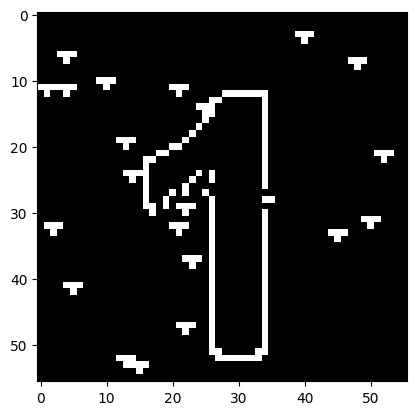

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(W_hood1[0][0], cmap='gray')  # 'cmap' define o mapa de cores. 'gray' é comum para imagens em escala de cinza
#plt.colorbar()  # Opcional: Adiciona uma barra de cores para referência
plt.show()  # Mostra a imagem


In [ ]:
W_hood2 = run_window_convolve_jax_vmap_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

In [ ]:
jnp.array_equal(jnp.array(W_hood2)[0], jnp.array(W_hood2)[1])

Array(False, dtype=bool)

In [ ]:
jnp.array_equal(jnp.array(W_hood1)[1], jnp.array(W_hood1)[0])

Array(True, dtype=bool)

In [ ]:
jnp.array(W_hood1).shape

(2, 10, 56, 56)

In [ ]:
sample_padded = jnp.pad(jax_train, ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)
Wsample_b1 = apply_convolve_vmap(sample_padded, W_matrices[0], bias[0])

In [ ]:
jnp.array_equal(jnp.array(Wsample_b1), jnp.array(W_hood1)[0])

Array(True, dtype=bool)

In [ ]:
Wsample_k = []
Wsample_b = jnp.pad(jnp.array(W_hood1[1]), ((0, 0), (WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)

for k in range(WOMC.batch):
  Wsample_k.append(apply_convolve_jit(Wsample_b[k], W_matrices[1], bias[1]))


In [ ]:
Wsample_k2 = apply_convolve_vmap(Wsample_b,  W_matrices[1], bias[1])

In [ ]:
jnp.array(Wsample_k).shape

(10, 56, 56)

In [ ]:
Wsample = []
Wsample.append(jnp.array(W_hood1[1]))
Wsample.append(Wsample_k)
jnp.array(Wsample).shape

(2, 10, 56, 56)

In [ ]:
IoU(jax_ytrain, W_hood1), IoU(jax_ytrain, W_hood2),  IoU(jax_ytrain, Wsample)

(Array(0.643973, dtype=float32),
 Array(0.99391854, dtype=float32),
 Array(0.9345323, dtype=float32))

In [ ]:
jnp.array_equal(jnp.array(Wsample_k2), jnp.array(W_hood2)[1])

Array(False, dtype=bool)

In [ ]:
 jnp.array(W_hood2)[1].shape

(10, 56, 56)

In [ ]:
jnp.array_equal(jnp.array(W_hood2)[1], jnp.array(Wsample_k))

Array(False, dtype=bool)

In [ ]:
W_hood1 = run_window_convolve_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

(10, 58, 58)


In [ ]:
W_hood11 = run_window_convolve_jax(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

In [ ]:
W_hood2 = run_window_convolve_jax_vmap_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

(10, 58, 58)


In [ ]:
W_hood = run_window_convolve(WOMC.train, WOMC.batch, W_matrices_np, 0, 0, bias)

In [ ]:
%timeit W_hood = run_window_convolve(WOMC.train, WOMC.batch, W_matrices_np, W_last_np, 1, bias)

7.33 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit W_hood = run_window_convolve(WOMC.train, WOMC.batch, W_matrices_np, 0, 0, bias)
%timeit W_hood1 = run_window_convolve_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)
%timeit W_hood2 = run_window_convolve_jax_vmap_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

9.16 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.3 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
964 µs ± 79.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
np.array_equal(np.array(W_hood)[0], np.array(W_hood)[1])

False

In [ ]:
sao_iguais = jnp.array_equal(jnp.array(W_hood1), jnp.array(W_hood11))

print("Os arrays são iguais:", sao_iguais)

Os arrays são iguais: True


In [ ]:
jnp.array_equal(jnp.array(W_hood11)[0], jnp.array(W_hood11)[1])

Array(True, dtype=bool)

In [ ]:
sao_iguais = jnp.array_equal(jnp.array(W_hood1), jnp.array(W_hood2))

print("Os arrays são iguais:", sao_iguais)

Os arrays são iguais: False


In [ ]:
jnp.array_equal(jnp.array(W_hood1)[1], jnp.array(W_hood2)[1])

Array(False, dtype=bool)

In [ ]:
jnp.array_equal(jnp.array(W_hood1)[0], jnp.array(W_hood1)[1])

Array(True, dtype=bool)

In [ ]:
jnp.array_equal(jnp.array(W_hood2)[0], jnp.array(W_hood2)[1])

Array(False, dtype=bool)

In [ ]:
jnp.array(W_hood1)[0].shape

(10, 56, 56)

In [ ]:
IoU(jax_ytrain, W_hood1), IoU(jax_ytrain, W_hood2)

(Array(0.643973, dtype=float32), Array(0.99391854, dtype=float32))

In [ ]:
sample_padded = jnp.pad(jax_train, ((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=-1)  # Ajuste de padding conforme necessário

In [ ]:
W_matrices0 = W_matrices[0]
bias0 = bias[0]

In [ ]:
def apply_convolve_jax(img, W_matrices, bias):
        img_c = jnp.zeros_like(img, dtype=float)
        for kernel in W_matrices:
            img_r = convolve2d_jax(img, kernel, mode='same')-bias
            img_r = (img_r > 0).astype(float)
            img_c += img_r
        img_c = jnp.where(img_c == 0, -1, img_c)
        return img_c[WOMC.increase:img_r.shape[0]-WOMC.increase, WOMC.increase:img_r.shape[1]-WOMC.increase]

apply_convolve_jit = jax.jit(apply_convolve_jax)
apply_convolve_vmap = vmap(apply_convolve_jax, in_axes=(0, None, None))

result_1 = apply_convolve_vmap(sample_padded,W_matrices0, bias0)

result_2 = []
for i in range(jax_train.shape[0]):
  result_2.append(apply_convolve_jit(sample_padded[i],W_matrices0, bias0))
result_2 = jnp.array(result_2)

In [ ]:
result_1 = apply_convolve_vmap(sample_padded,W_matrices0, bias0)

In [ ]:
result_2 = []
for i in range(jax_train.shape[0]):
  result_2.append(apply_convolve_jit(jax_train[i],W_matrices0, bias0))
result_2 = jnp.array(result_2)

In [ ]:
result_1.shape, result_2.shape

((10, 56, 56), (10, 56, 56))

In [ ]:
jnp.array_equal(jnp.array(result_1), jnp.array(result_2))

Array(True, dtype=bool)

In [ ]:
jnp.array(W_hood).shape

(2, 10, 56, 56)

In [ ]:
W_hood2.shape

(2, 10, 56, 56)

In [ ]:
bias

array([4., 4.])

In [ ]:
W_matrices[0].shape

(18, 3, 3)

In [ ]:
len(W_matrices)

2

In [ ]:
jnp.array(W_matrices).shape

ValueError: All input arrays must have the same shape.

In [ ]:
jnp.array(W_hood).shape

(2, 10, 56, 56)

In [ ]:
%timeit W_hood = run_window_convolve(WOMC.train, WOMC.batch, W_matrices_np, 0, 0, bias)
%timeit W_hood = run_window_convolve_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

10.4 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.14 ms ± 418 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
W_hood1 = run_window_convolve(WOMC.train, WOMC.batch, W_matrices_np, W_hood, 0, bias)
W_hood2 = run_window_convolve_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

In [ ]:
from jax import device_get
W_hood2_numpy = device_get(W_hood2)
sao_iguais = np.array_equal(np.array(W_hood1), np.array(W_hood2_numpy))

print("Os arrays são iguais:", sao_iguais)

Os arrays são iguais: False


In [ ]:
calculate_error(WOMC.ytrain, W_hood1, 'iou')

0.9512152470691504

In [ ]:
calculate_error(WOMC.ytrain, WOMC.train, 'iou')

0.9930189723936028

In [ ]:
calculate_error(WOMC.ytrain, W_hood2_numpy, 'iou')

0.7824518367514517

In [ ]:
calculate_error_jax(jax_ytrain, W_hood2, 'iou')

Array(0.7824518, dtype=float32)

In [ ]:
IoU(jax_ytrain, W_hood2)

Array(0.643973, dtype=float32)

In [ ]:
import jax.numpy as jnp
from jax import vmap

# Definindo uma função que opera em um único vetor x
def f(x):
    return x ** 2 + 1

# Aplicando vmap para vetorizar a função f
v_f = vmap(f)

# Criando uma matriz X de entradas
X = jnp.array([[1, 2, 3],
               [4, 5, 6]])

# Aplicando a função vetorizada v_f para a matriz X
result = v_f(X)

print(result)


[[ 2  5 10]
 [17 26 37]]


In [ ]:
np.array(W_hood2_numpy).shape

(2, 10, 56, 56)

In [ ]:
np.array(W_hood1).shape

(2, 10, 56, 56)

In [ ]:
W_hood2_numpy

[array([[[-1., -1., -1., ..., -1., -1., -1.],
         [-1., -1., -1., ..., -1., -1., -1.],
         [-1., -1., -1., ..., -1., -1., -1.],
         ...,
         [-1., -1., -1., ..., -1., -1., -1.],
         [-1., -1., -1., ..., -1., -1., -1.],
         [-1., -1., -1., ..., -1., -1., -1.]],
 
        [[-1., -1., -1., ..., -1., -1., -1.],
         [-1., -1., -1., ..., -1., -1., -1.],
         [-1., -1., -1., ..., -1., -1., -1.],
         ...,
         [-1., -1., -1., ..., -1., -1., -1.],
         [-1., -1., -1., ..., -1., -1., -1.],
         [-1., -1., -1., ..., -1., -1., -1.]],
 
        [[-1., -1., -1., ..., -1., -1., -1.],
         [-1.,  1.,  1., ..., -1., -1., -1.],
         [-1., -1.,  1., ...,  1., -1., -1.],
         ...,
         [-1., -1., -1., ..., -1., -1., -1.],
         [ 1.,  1.,  1., ..., -1., -1., -1.],
         [-1.,  1., -1., ..., -1., -1., -1.]],
 
        ...,
 
        [[-1., -1., -1., ..., -1., -1., -1.],
         [-1., -1., -1., ..., -1., -1., -1.],
         [-1.,

In [ ]:
jax_train[0].shape

(56, 56)

In [ ]:
W_matrices[0][0].shape

(3, 3)

In [ ]:
bias[0]

4.0

In [ ]:
img_c = jnp.zeros_like(jax_train[0], dtype=float)
img_c.shape

(56, 56)

In [ ]:
img_b = jnp.pad(jax_train[0], ((WOMC.increase, WOMC.increase), (WOMC.increase, WOMC.increase)), mode='constant', constant_values=-1)


In [ ]:
img_b.shape

(58, 58)

In [ ]:
img_r = convolve2d_jax(img_b, W_matrices[0][0], mode='same')-bias[0]

In [ ]:
img_r.shape

(58, 58)

In [ ]:
Wsample_k = apply_convolve_jit(jax_train[0],W_matrices[0], bias[0])

In [ ]:
Wsample_k.shape

(56, 56)

In [ ]:
jax_train[0].shape

(56, 56)

In [ ]:
W_hood = run_window_convolve_jit(jax_train, WOMC.batch, W_matrices, W_last, 0, bias)

TracerIntegerConversionError: The __index__() method was called on traced array with shape int32[].
The error occurred while tracing the function true_fun2 at <ipython-input-85-63528094e7f1>:35 for cond. This concrete value was not available in Python because it depends on the value of the argument i.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

In [ ]:
W_hood = run_window_convolve(WOMC.train, WOMC.batch, W_matrices_np, 0, 0, bias)

In [ ]:
np.array(W_hood).shape

(2, 10, 56, 56)

In [ ]:
%timeit W_hood = run_window_convolve(WOMC.train, WOMC.batch, W_matrices_np, 0, 0, bias)
%timeit W_hood = run_window_convolve_jit(jax_train, WOMC.batch, W_matrices, W, 0, bias)

857 ms ± 30.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on traced array with shape float32[10,56,56].
The error occurred while tracing the function run_window_convolve_jax at <ipython-input-28-a1c5428bb5d7>:22 for jit. This concrete value was not available in Python because it depends on the value of the argument sample.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

In [ ]:
isinstance(W_matrices[0], jnp.ndarray)

True

In [ ]:
jax_train = jnp.array(WOMC.train)
jax_ytrain = jnp.array(WOMC.ytrain)

In [ ]:
%%timeit
W_hood = run_window_convolve(jax_train, WOMC.batch, W_matrices, 0, 0, bias)

931 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
apply_convolve_jit = jax.jit(apply_convolve_jax)
apply_convolve_np_jit = jax.jit(apply_convolve)

In [ ]:
%timeit img=apply_convolve(WOMC.train[0], W_matrices_np[0], bias[0])
%timeit img = apply_convolve_sc2(WOMC.cp_train[0], W_matrices_cp[0], bias[0])

422 µs ± 79.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.94 ms ± 498 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit img = apply_convolve_sc2(jax_train[0], W_matrices[0], bias[0])

In [ ]:
%timeit img=apply_convolve(WOMC.train[0], W_matrices_np[0], bias[0])
#%timeit img=apply_convolve_np_jit(WOMC.train[0], W_matrices_np[0], bias[0])
%timeit img = apply_convolve_sc2(WOMC.cp_train[0], W_matrices_cp[0], bias[0])
%timeit img=apply_convolve_jax(jax_train[0], W_matrices[0], bias[0])
%timeit img = apply_convolve_jit(jax_train[0], W_matrices[0], bias[0])

398 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.35 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
37 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
771 µs ± 99.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
apply_convolve_np_jit = jax.jit(apply_convolve)

In [ ]:
%timeit img=apply_convolve(WOMC.train[0], W_matrices_np[0], bias[0])

495 µs ± 105 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:

run_window_convolve_jit = jax.jit(run_window_convolve)

In [ ]:
%%timeit
W_hood = run_window_convolve_jit(jax_train, WOMC.batch, W_matrices, 0, 0, bias)

TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on traced array with shape float32[10,56,56].
The error occurred while tracing the function run_window_convolve at <ipython-input-21-fb15093a9dd4>:20 for jit. This concrete value was not available in Python because it depends on the value of the argument sample.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

In [ ]:
%%timeit
W_hood = run_window_convolve(WOMC.cp_train, WOMC.batch, W_matrices, 0, 0, bias)

In [ ]:
import numpy as np
import numba
from numba import cuda
from numba import jit



In [ ]:
def function(ar):
  for i in range(10000):
      ar[i] = (1,2,3)


In [ ]:
%%timeit
ar = np.zeros((3, 3))
function(ar)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
@jit()
def function(ar):
  for i in range(3):
      ar[i] = (1,2,3)


<ipython-input-15-5c23d219c9b1>:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit()


In [ ]:
%%timeit
ar = np.zeros((3, 3))
function(ar)

The slowest run took 31.83 times longer than the fastest. This could mean that an intermediate result is being cached.
3.21 µs ± 6.11 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
